## ETSY Machine learning Assignment

## Installing Packages and libraries

In [ ]:
!which python

/usr/local/bin/python


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python --version

Python 3.9.16


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.1 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=1bea4bf7de24bf494abfb04dda8f74d1aff1dba54a2c0ac5bd40e23e127835d5
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence_transformers


In [ ]:
!pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install rake-nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install colour

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# libraries
import io
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn import metrics
from sklearn.model_selection import train_test_split

import pyarrow.parquet as pq

import nltk

import requests
import json
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from rake_nltk import Rake 
import regex as re
from nltk.corpus import stopwords

import lightgbm as lgb
from xgboost import XGBClassifier
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

from sentence_transformers import SentenceTransformer, util

# Matplotlib configuration
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 16 }
plt.rc('font', **font)

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
#download packages
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Reading Dataset

In [ ]:
# set random seed
np.random.seed(seed=42)

In [ ]:
PATH = f"/content/drive/MyDrive/etsy-data"

In [ ]:
!ls -l {PATH}

ls: /content/drive/MyDrive/etsy-data: No such file or directory
lrw------- 1 root root 0 Apr 13 11:04 /content/drive/MyDrive/etsy-data -> /content/drive/.shortcut-targets-by-id/1pYwGvaMh8sKissSppkLYDuvYb-jkDG5t/etsy-data


In [ ]:
parquet_filenames_train = !ls -1 {PATH}/parquet/train

In [ ]:
parquet_filenames_train[:3]

['part-00000-of-00278.parquet',
 'part-00001-of-00278.parquet',
 'part-00002-of-00278.parquet']

In [ ]:
parquet_filenames_test = !ls -1 {PATH}/parquet/test

In [ ]:
parquet_filenames_test[:3]

['part-00000-of-00278.parquet',
 'part-00001-of-00278.parquet',
 'part-00002-of-00278.parquet']

In [ ]:
tfrecord_filenames_train = !ls -1 {PATH}/tfrecords/train

In [ ]:
tfrecord_filenames_train[:3]

['part-00000-of-00278.tfrecord',
 'part-00001-of-00278.tfrecord',
 'part-00002-of-00278.tfrecord']

In [ ]:
tfrecord_filenames_test = !ls -1 {PATH}/tfrecords/test

In [ ]:
tfrecord_filenames_test[:3]

['part-00000-of-00278.tfrecord',
 'part-00001-of-00278.tfrecord',
 'part-00002-of-00278.tfrecord']

# Exploratory Data Analysis

### Training Dataset
This dataset can be used to train models and learn patterns from.

Reading data from Parquet dataset

In [ ]:
#Reading Parquet files for train dataset
def get_parquet_data(folder, N):
    """ Read parquet data from mutiple files """

    filenames = [ 
        f"{PATH}//parquet//{folder}//part-{i:05d}-of-{N:05d}.parquet" 
        for i in range(N)
    ]

    dataframes = [ 
        pd.read_parquet(filename, engine='pyarrow') 
        for filename in filenames
    ]
    
    return pd.concat(dataframes)

df_train = get_parquet_data("train", len(parquet_filenames_train))


In [ ]:
df_train = get_parquet_data("train", len(parquet_filenames_train))

In [ ]:
#Read parquet files for test dataset
def get_parquet_data_test(folder, N):
    """ Read parquet data from mutiple files """

    filenames = [ 
        f"{PATH}//parquet//{folder}//part-{i:05d}-of-{N:05d}.parquet" 
        for i in range(N)
    ]

    dataframes = [ 
        pd.read_parquet(filename, engine='pyarrow') 
        for filename in filenames
    ]
    
    return pd.concat(dataframes)

df_test = get_parquet_data("test", len(parquet_filenames_test))

In [ ]:
f"Number of rows in train: {len(df_train):,}"

'Number of rows in train: 245,485'

In [ ]:
f"Number of unique products in train: {len(df_train['product_id'].unique()):,}"

'Number of unique products in train: 245,485'

In [ ]:
f"Number of columns in train: {len(df_train.columns):,}"

'Number of columns in train: 21'

In [ ]:
df_train.isna().sum()

product_id                   0
title                      940
description                940
tags                     34910
type                      1274
room                    236758
craft_type              212965
recipient               231732
material                224609
occasion                192256
holiday                 204466
art_subject             242712
style                   228453
shape                   243127
pattern                 234807
bottom_category_id           0
bottom_category_text         0
top_category_id              0
top_category_text            0
color_id                     0
color_text                   0
dtype: int64

In [ ]:
list(df_train.columns)

['product_id',
 'title',
 'description',
 'tags',
 'type',
 'room',
 'craft_type',
 'recipient',
 'material',
 'occasion',
 'holiday',
 'art_subject',
 'style',
 'shape',
 'pattern',
 'bottom_category_id',
 'bottom_category_text',
 'top_category_id',
 'top_category_text',
 'color_id',
 'color_text']

In [ ]:
COLORS = df_train['color_id'].unique()
NUM_COLORS = len(COLORS)
f"Number of colors in train: {NUM_COLORS:,}"

'Number of colors in train: 20'

In [ ]:
f"Number of top categories in train: {len(df_train['top_category_text'].unique()):,}"

'Number of top categories in train: 15'

In [ ]:
f"Number of bottom categories in train: {len(df_train['bottom_category_text'].unique()):,}"

'Number of bottom categories in train: 2,782'

In [ ]:
NUM_TOP_CATEGORIES=len(df_train['top_category_id'].unique())

In [ ]:
NUM_BOTTOM_CATEGORIES=len(df_train['bottom_category_id'].unique())

In [ ]:
max_title_length = 0
for title in df_train['title']:
    if (title== np.nan) or (title==None) :
        pass
    else:
      title_length = len(title.split())
      if title_length > max_title_length:
        max_title_length = title_length


In [ ]:
max_title_length 

36

In [ ]:
max_description_length = 0
for title in df_train['description']:
    if (title== np.nan) or (title==None) :
        pass
    else:
      title_length = len(title.split())
      if title_length > max_title_length:
        max_description_length = title_length

In [ ]:
max_description_length

142

In [ ]:
pd.value_counts(df_train['top_category_text'], sort=True, ascending=False)

home_and_living                53200
craft_supplies_and_tools       42348
clothing                       32028
toys_and_games                 14427
accessories                    12610
bath_and_beauty                12426
paper_and_party_supplies       10811
shoes                          10355
weddings                       10333
jewelry                         9457
art_and_collectibles            8741
electronics_and_accessories     8177
books_movies_and_music          7378
bags_and_purses                 6645
pet_supplies                    6549
Name: top_category_text, dtype: int64

In [ ]:
##Plot number of top categories

# Define the color sequence for each category
colors = px.colors.qualitative.Dark24[:15]

# Create a new DataFrame with the value counts for each category
column = 'top_category_text'
category_counts = df_train[column].value_counts().reset_index()
category_counts.columns = [column, 'count']

# Create the horizontal bar chart
fig = px.bar(category_counts,
             x='count',
             y=column,
             orientation='h',
             color=column,
             color_discrete_sequence=colors,
             title="Number of Products per Top Category")

# Format the x-axis
fig.update_xaxes(title="Number of products", tickformat=',r')

# Remove the y-axis label and adjust the title position
fig.update_yaxes(title=None)
fig.update_layout(title_x=0.5)

# Display the chart
fig.show()


The Horizontal bar graph above show the number of products in each top category. From the visualisation above we can say that home_and_living,craft_supplies_and_tools and clothing are the top 3 categories with highest number of products.

In [ ]:
#Plot number of categories for colour


# Define the color to use for the bars
color = '#008B8B'

# Create a new DataFrame with the value counts for each category
column = 'color_text'
category_counts = df_train[column].value_counts().reset_index()
category_counts.columns = [column, 'count']

# Create the horizontal bar chart
fig = px.bar(category_counts,
             x='count',
             y=column,
             orientation='h',
             color=column,
             color_discrete_sequence=[color],
             #color_discrete_sequence=color,
             title="Number of Products per Colour Category")

# Format the x-axis
fig.update_xaxes(title="Number of products", tickformat=',r')

# Remove the y-axis label and adjust the title position
fig.update_yaxes(title=None)
fig.update_layout(title_x=0.5)

# Display the chart
fig.show()

We tried to visualise the number pf products for each colour in the dataset. From the visulaisation above we saw that the top 3 colours with highest number of products are black, white and blue. We also foound that the colour grey has only one sample in the dataset.

In [ ]:
#Check values for each color
pd.value_counts(df_train['color_text'], sort=True, ascending=False)

black        32537
white        31194
blue         26972
brown        22891
green        15675
pink         15499
red          15243
silver       14892
beige        12664
gold         10728
other         9920
yellow        7406
purple        6639
clear         6337
orange        5346
rainbow       5226
bronze        2922
copper        2237
rose gold     1156
grey             1
Name: color_text, dtype: int64

In [ ]:
unique_colors = df_train[['color_text', 'color_id']].drop_duplicates()

for i, row in unique_colors.iterrows():
    print(f"Color: {row['color_text']}, ID: {row['color_id']}")


Color: purple, ID: 12
Color: black, ID: 1
Color: blue, ID: 2
Color: brown, ID: 4
Color: yellow, ID: 18
Color: green, ID: 9
Color: red, ID: 14
Color: white, ID: 17
Color: clear, ID: 5
Color: silver, ID: 16
Color: orange, ID: 10
Color: pink, ID: 11
Color: gold, ID: 7
Color: beige, ID: 0
Color: other, ID: 19
Color: copper, ID: 6
Color: rainbow, ID: 13
Color: rose gold, ID: 15
Color: bronze, ID: 3
Color: grey, ID: 8


In [ ]:
pd.value_counts(df_train['bottom_category_text'], sort=True, ascending=False)

clothing.womens_clothing.lingerie                                                                                   98
clothing.gender_neutral_kids_clothing.hoodies_and_sweatshirts.sweatshirts                                           98
electronics_and_accessories.car_parts_and_accessories.car_accessories.license_plates                                98
weddings.clothing                                                                                                   97
craft_supplies_and_tools.closures_and_fasteners.snaps                                                               97
                                                                                                                    ..
craft_supplies_and_tools.fabric_and_notions.notions.pins_and_needles.pin_and_needle_accessories.point_protectors    44
shoes.mens_shoes.sneakers_and_athletic_shoes.platform_and_club_sneakers                                             43
craft_supplies_and_tools.glue_and_adhesives.adhe

In [ ]:
#Find bottom category with maximum number of substring
max_substring_length = 0
max_substring_category = ''

# loop through each bottom category and split by '.' to get the substrings
for category in df_train['bottom_category_text']:
    substrings = category.split('.')
    if len(substrings) > max_substring_length:
          max_substring_length = len(substrings)
          max_substring_category = category

print("Maximum substring length:", max_substring_length)
print("Category with maximum substring length:", max_substring_category)


Maximum substring length: 7
Category with maximum substring length: home_and_living.kitchen_and_dining.cookware.pots_and_pans.pans.skillets.cast_iron_skillets


Reading data from Tfrecorsd dataset

In [ ]:
tfrecord_filename_train = f"{PATH}/tfrecords/train/{tfrecord_filenames_train[1]}"
#raw_dataset_train = tf.data.TFRecordDataset(tfrecord_filename_train)

In [ ]:
# Create a description of the features
feature_desc = {
    'product_id': tf.io.FixedLenFeature([], tf.int64),
    'title': tf.io.FixedLenFeature([], tf.string),
    'description': tf.io.FixedLenFeature([], tf.string),
    'tags': tf.io.FixedLenFeature([], tf.string),
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
    'image/width': tf.io.FixedLenFeature([], tf.int64),
    'image/height': tf.io.FixedLenFeature([], tf.int64),
    # only in training
    'top_category_text': tf.io.FixedLenFeature([], tf.string),
    'color_text': tf.io.FixedLenFeature([], tf.string),
    # more can be added ...
}# Create a description of the features
feature_desc = {
    'product_id': tf.io.FixedLenFeature([], tf.int64),
    'title': tf.io.FixedLenFeature([], tf.string),
    'description': tf.io.FixedLenFeature([], tf.string),
    'tags': tf.io.FixedLenFeature([], tf.string),
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
    'image/width': tf.io.FixedLenFeature([], tf.int64),
    'image/height': tf.io.FixedLenFeature([], tf.int64),
    # only in training
    'top_category_text': tf.io.FixedLenFeature([], tf.string),
    'color_text': tf.io.FixedLenFeature([], tf.string),
    # more can be added ...
}

In [ ]:
def _parse_function(example_proto):
    # Parse the input `tf.train.Example` proto using the dictionary above.
    return tf.io.parse_single_example(example_proto, feature_desc)

In [ ]:
parsed_dataset_train = raw_dataset_train.map(_parse_function)

In [ ]:
def get_images(parsed_dataset, column, N=10):
    
    images = []
    titles = []
    for features in parsed_dataset.take(N):
        img_bytes = features['image/encoded'].numpy()
        if column in features:
            text = features[column].numpy().decode('utf-8')
        else:
            text = 'unknown'
        bytes_io = io.BytesIO(img_bytes)
        image = Image.open(bytes_io)
        images.append(image)
        titles.append(text)

    return images, titles

In [ ]:
images, titles = get_images(parsed_dataset_train, 'color_text')

In [ ]:
def show(images, titles, N=100):
    
    num_cols = 5
    num_rows = N // num_cols
    plt_height = 3 * num_rows
    
    plt.figure(figsize=(12, plt_height))
    for i, (image, title) in enumerate(zip(images[:N], titles[:N])):
        ax = plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(image)
        plt.title(title, fontsize = 12)
        plt.axis("off")
    plt.show()

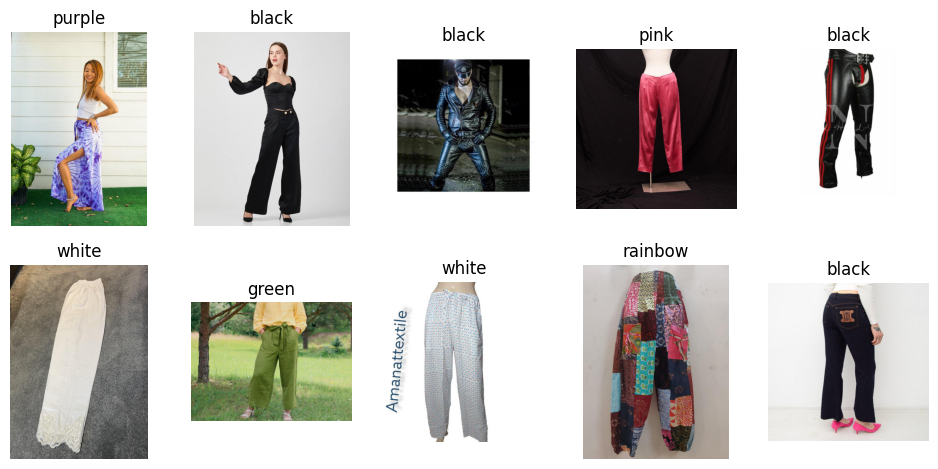

In [ ]:
show(images, titles)

### Test Dataset

The test dataset will be used to predict using the model/s you have trained


#### Parquet

In [ ]:
df_test = get_parquet_data("test", len(parquet_filenames_test))

In [ ]:
f'Number of rows in test: {len(df_test):,}'

'Number of rows in test: 27,119'

In [ ]:
f"Number of unique products in test: {len(df_test['product_id'].unique()):,}"

'Number of unique products in test: 27,119'

In [ ]:
f"Number of columns in test: {len(df_test.columns):,}"

'Number of columns in test: 15'

In [ ]:
list(df_test.columns)

['product_id',
 'title',
 'description',
 'tags',
 'type',
 'room',
 'craft_type',
 'recipient',
 'material',
 'occasion',
 'holiday',
 'art_subject',
 'style',
 'shape',
 'pattern']

In [ ]:
filename = f"{PATH}/tfrecords/test/{tfrecord_filenames_test[2]}"

In [ ]:
raw_dataset_test = tf.data.TFRecordDataset(filename)

In [ ]:
feature_desc.pop('top_category_text')


FixedLenFeature(shape=[], dtype=tf.string, default_value=None)

In [ ]:
feature_desc.pop('color_text')

FixedLenFeature(shape=[], dtype=tf.string, default_value=None)

In [ ]:
parsed_dataset_test = raw_dataset_test.map(_parse_function)

In [ ]:
images, titles = get_images(parsed_dataset_test, 'top_category_text')

In [ ]:
images, titles = get_images(parsed_dataset_test, 'color_text')

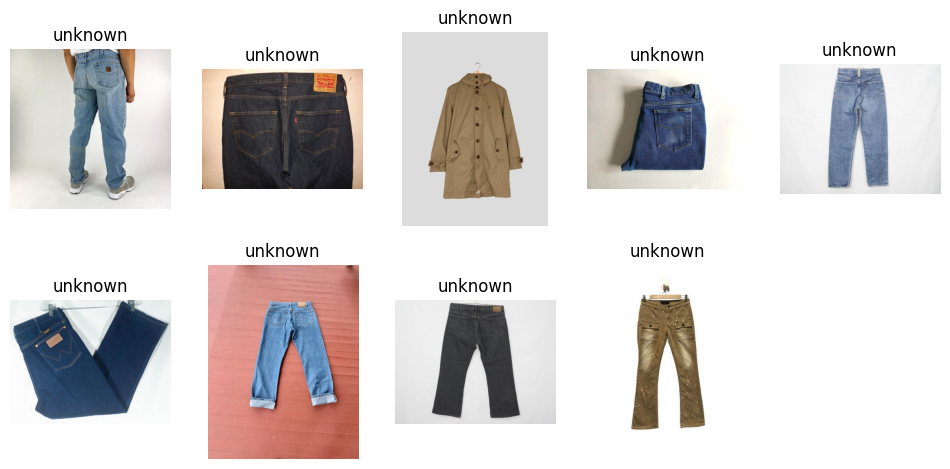

In [ ]:
show(images, titles)

# Data Preparation

### We will first prepare our training data using Parquet files.


In [ ]:
#Define a list to store preprocessed text data
all_text_info =[]
data_df_training=df_train.copy()

In [ ]:
data_df_training.fillna("", inplace=True)

In [ ]:
data_df_training

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,art_subject,style,shape,pattern,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text
0,543497833,"Full-face custom motorcycle helmet ,Motorcycle...",Helmetartthai from Thailand ( Since 2016) \n\n...,"predator helmet,motorcycle helmet,helmet,handm...",physical,,,,,,...,,,,,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,12,purple
1,718680498,"Full-face predator motorcycle helmet ,Custom ...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Predator helmet,Custom helmet,Handmade helme,P...",physical,,,,,,...,,,,,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black
2,718823736,"Full-face custom motorcycle helmet ,Motorcycle...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Predator helmet,Custom helmet,Handmade helmet,...",physical,,,,,,...,,,,,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,2,blue
3,608840803,"Full-face custom motorcycle helmet ,Motorcycle...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Predator helmet,Custom helmet,Handmade helmet,...",physical,,,,,,...,,,,,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,4,brown
4,804070543,"Full-face predator motorcycle helmet ,Custom ...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Custom helmet,Handmade helmet,Predator helmet,...",physical,,,,,,...,,,,,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,1330991677,Vintage - 1980&#39;s - APRI NIGHTS - Black Alu...,This is a charming Vintage - 1980&#39;s - APRI...,"Black Mesh Beading,Apri Nights,Evening Bag,Cro...",physical,,,,,prom,...,,,,,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,1,black
679,927998323,Gold Eloquent Envelope Clutch bag,Looking for a classy posh bag to hit up a hot ...,"clutch,gold,soft,envelope,disco",physical,,,,,wedding,...,,,,,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,7,gold
680,1393052238,"Personalized pouch, toiletry bag, makeup bag",Personalized items are not returned or exchang...,,physical,,,,,bachelorette party,...,,,,,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,17,white
681,775199837,"Floral handbag, Canvas bag, Bridesmaid bag, gu...",Handbag of flowers and jute ideal for day part...,"Flower handbag,Canvas bag,Bridesmaid bag,guest...",physical,,,,,bridal shower,...,,,,,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,0,beige


We can see that in the dataset given the title, description, tags and type provide significant information. We will be combining the text from all these columns for preprocessing.

In [ ]:
#Combine all the text data in the dataset into one single list 
for index, row in data_df_training.iterrows():

  combined_text= row['title'] +" "+ row['description'] + row['type'] + row['tags']
  all_text_info.append(combined_text)

len(all_text_info)

245485

In [ ]:
data_df_training['all_text_info']=all_text_info

In [ ]:
f"Number of products for training: {len(data_df_training):,}"

'Number of products for training: 245,485'

In [ ]:
data_df_training.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,style,shape,pattern,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text,all_text_info
0,543497833,"Full-face custom motorcycle helmet ,Motorcycle...",Helmetartthai from Thailand ( Since 2016) \n\n...,"predator helmet,motorcycle helmet,helmet,handm...",physical,,,,,,...,,,,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,12,purple,"Full-face custom motorcycle helmet ,Motorcycle..."
1,718680498,"Full-face predator motorcycle helmet ,Custom ...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Predator helmet,Custom helmet,Handmade helme,P...",physical,,,,,,...,,,,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black,"Full-face predator motorcycle helmet ,Custom ..."
2,718823736,"Full-face custom motorcycle helmet ,Motorcycle...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Predator helmet,Custom helmet,Handmade helmet,...",physical,,,,,,...,,,,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,2,blue,"Full-face custom motorcycle helmet ,Motorcycle..."
3,608840803,"Full-face custom motorcycle helmet ,Motorcycle...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Predator helmet,Custom helmet,Handmade helmet,...",physical,,,,,,...,,,,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,4,brown,"Full-face custom motorcycle helmet ,Motorcycle..."
4,804070543,"Full-face predator motorcycle helmet ,Custom ...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Custom helmet,Handmade helmet,Predator helmet,...",physical,,,,,,...,,,,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black,"Full-face predator motorcycle helmet ,Custom ..."


In [ ]:
all_text_info[1]

'Full-face predator motorcycle  helmet ,Custom predator motorcycle helmet ,Handmade predator motorcycle helmet, Custom motorcycle helmet Helmetartthai from Thailand ( Since 2016) \\n\\n- Who am I ? \\n         : My name is Phayong Khonsung from Thailand. I am the shop owner, creator, and artist that manage all of the processes \\n            by myself.\\n\\n- What is my mission ?\\n         : To help you show off your unique personality via the motorcycle helmet.\\n\\n- About the safety of the product.\\n       : It is a full-face custom motorcycle helmet.\\n       : Made from DOT or ECE 22-05 certified helmet and strong lightweight fiberglass, safe to riding.\\n\\n- Can I request to change some options on the helmet? \\n       : Yes, of course. I gladly accept them.\\n\\n- What are the options that I can change? \\n       : Details on fiberglass, the color of the Visor, the color of Dreadlocks, the color of Tips, add some words, add some name, \\n       add some symbols, etc.\\n\\n- H

To ensure that our model can perform well on data it has not yet seen, we will be dividing the training dataset into two subsets: a training set and a validation set. This will allow us to evaluate the performance of our model on unseen data and make any necessary adjustments before applying it to the test set.

In [ ]:
#Splitting the train dataset into Train and validation datasets
df_training, df_validation = train_test_split(
    data_df_training, 
    test_size=0.1, 
    stratify=df_train['top_category_text'], 
    random_state=42)

Applying Text Preprocessing steps: In the followting sections, some of the text preprocessing steps were applied to the data. The steps included:

1.   Removing the non ASCII characters from the text
2.   Removing punctuations, apostrophe, special characters etc
3.   Stop words removal
4.   lemmatize the text
5.   Tokenization



In [ ]:
# function to remove the Non Ascii punctuations, apostrophe, special characters using regular expressions
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text
# stop words are the words that convery little to no information about the actual content like the words:the, of, for etc
def remove_stopwords(word_tokens):
    filtered_sentence = [] 
    stop_words = nltk.corpus.stopwords.words('english')
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return filtered_sentence
# function for lemmatization 
def lemmatize(x):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

In [ ]:
#Function to create tokens
tokenizer = RegexpTokenizer(r'\w+')
def tokenize(x): 
    return tokenizer.tokenize(x)

In [ ]:
#Mapping all the function on dataset
all_text_info_clean = list(map(clean_text, df_training['all_text_info']))
tokens = list(map(tokenize,all_text_info_clean))
tokenised = list(map(remove_stopwords,tokens))
lems =list(map(lemmatize,tokenised))

In [ ]:
# finding the keywords using the rake algorithm from NLTK
# rake is Rapid Automatic Keyword Extraction algorithm, and is used for domain independent keyword extraction
#df_training['keywords'] = ""
finallist = [] 
for index,row in df_training.iterrows():
    comb_text = row['all_text_info']
    r = Rake()
    r.extract_keywords_from_text(comb_text)
    key_words_dict = r.get_word_degrees()
    mylist = (list(key_words_dict.keys()))
    result = " ".join([item for item in mylist if isinstance(item, str)]) 
    finallist.append(result)
print(len(finallist))

220936


In [ ]:
df_training['keywords'] = finallist

In [ ]:
df_training.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,shape,pattern,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text,all_text_info,keywords
1018,1345283755,"Happy New Home Card, Congratulations On Your N...",New Home Card designed and printed in EU on hi...,"personalised card,Moving Cards,For Friends,New...",physical,,,,,moving,...,,,1283,paper_and_party_supplies.paper.greeting_cards....,10,paper_and_party_supplies,0,beige,"Happy New Home Card, Congratulations On Your N...",happy new home card congratulations housewarmi...
197,1179965649,Vintage Kids Brown Leather Oxford Shoes - Litt...,Vintage Kids Brown Leather Oxford Shoes - Yout...,"brown leather,school shoes,cute,toddler shoes,...",physical,,,,,,...,,,1436,shoes.boys_shoes.oxfords_and_wingtips,12,shoes,4,brown,Vintage Kids Brown Leather Oxford Shoes - Litt...,vintage kids brown leather oxford shoes little...
1474,219332186,"Shih Tzu, Dog Treat Jar, Personalized Pet, Sto...",Petzoup presents a custom hand painted pet tre...,"Shih Tzu,Shihtzu,dog treat jar,personalized pe...",physical,,,,,anniversary,...,,,1388,pet_supplies.pet_feeding,11,pet_supplies,0,beige,"Shih Tzu, Dog Treat Jar, Personalized Pet, Sto...",shih tzu dog treat jar personalized pet storag...
2045,1023279833,Beanie Babies Ty Animal Collection Collector&#...,"Birthday is \nAugust 28, 1997. \nStamped 502","Vintage,Beanie Babies,Ty,POUNCE,Cat,Kitten,Sta...",physical,,,,,baby shower,...,,,2399,toys_and_games.toys.stuffed_animals_and_plushi...,13,toys_and_games,4,brown,Beanie Babies Ty Animal Collection Collector&#...,beanie babies ty animal collection collector &...
449,1123141297,"Zachary Levi Car Air Freshener, Actor Air Fres...",This is a handmade car air fresheners inspired...,"Celebrity,Present,Car,fun,actor,Shazam,Zachary...",physical,,,,,,...,,,12419,electronics_and_accessories.car_parts_and_acce...,7,electronics_and_accessories,17,white,"Zachary Levi Car Air Freshener, Actor Air Fres...",zachary levi car air freshener actor shazam no...


In [ ]:
len(df_training['keywords'])

220936

In [ ]:
keywords_tags = [] 
for index,row in df_training.iterrows():
    comb_text = str(row['keywords'])+ " "+str(row['tags'])
    keywords_tags.append(comb_text)

In [ ]:
df_training['keywords_tags']= keywords_tags

In [ ]:
#Saving our training df into a csv file
df_training.to_csv(f"{PATH}/df_training.csv", index=False) 

In [ ]:
df_training=pd.read_csv(f"{PATH}/df_training.csv")

In [ ]:
df_validation.head()

In [ ]:
#Mapping all the function on dataset
all_text_info_clean_val = list(map(clean_text, df_validation['all_text_info']))
tokens_val = list(map(tokenize,all_text_info_clean_val))
tokenised_val = list(map(remove_stopwords,tokens_val))
lems_val =list(map(lemmatize,tokenised_val))

In [ ]:
# finding the keywords using the rake algorithm from NLTK
# rake is Rapid Automatic Keyword Extraction algorithm, and is used for domain independent keyword extraction

finallist_val = [] 
for index,row in df_validation.iterrows():
    comb_text = row['all_text_info']
    r = Rake()
    r.extract_keywords_from_text(comb_text)
    key_words_dict = r.get_word_degrees()
    mylist = (list(key_words_dict.keys()))
    result = " ".join([item for item in mylist if isinstance(item, str)]) 
    finallist_val.append(result)
print(len(finallist_val))


24549


In [ ]:
df_validation['keywords'] = finallist_val

In [ ]:
keywords_tags_val = [] 
for index,row in df_validation.iterrows():
    comb_text = str(row['keywords'])+ " "+str(row['tags'])
    keywords_tags_val.append(comb_text)

In [ ]:
df_validation['keywords_tags']= keywords_tags_val

In [ ]:
df_validation.to_csv(f"{PATH}/df_validation.csv", index=False) 

In [ ]:
df_validation =pd.read_csv(f"{PATH}/df_validation.csv")

#### Prepare test data for predictions

In order to ensure consistency between the training, validation, and test datasets, we applied the same preprocessing steps to the test dataset as were applied to the training and validation datasets. This will ensure to generate accurate predictions for the test dataset using our trained model.

In [ ]:
df_test

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern
0,1323824090,12 Small Pressed Reddish-Orange Japanese Maple...,12 small pressed reddish-orange Japanese maple...,"Leaves,Art,Crafts,Paper crafts,Fall,Soap,Bookm...",physical,None,floral arranging,None,None,None,None,None,None,None,None
1,544175230,"Christmas artificial leaves, Holiday decor, Gl...",Glitter fake leaves.\nPrice for 5 leaves \nLea...,"Holiday decor,Glitter fake leaves,Faux greener...",physical,None,floral arranging,None,None,None,None,None,None,None,None
2,895779370,Fresh Holly Leaves ( 50 count) - Christmas Gre...,This listing includes 50 fresh HOLLY Leaves Fr...,"lucky Holly leaves,Christmas Greenery,Christma...",physical,None,floral arranging,None,None,None,None,None,None,None,None
3,641102090,"Christmas artificial greenery, Gold plants, Gl...",Glitter pine stems.\nPrice for 1 branch\nThe t...,"Glitter pine stems,Holiday decor,Christmas Cra...",physical,None,floral arranging,None,None,None,None,None,None,None,None
4,1340603160,Red crown of thorn corona thai Hybrid sale Cut...,Free shipping,"cactus live plant,Crown of thorns",physical,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,809100810,A Book of 1000 Things by George Stimpson,Vintage A Book About A Thousand Things George ...,None,physical,None,None,None,None,None,None,None,None,None,None
171,1358895140,Vintage Story of Sugar in Hawaii Softcover Boo...,The Story of Sugar in Hawaii\n\nPublished by T...,"Vintage,Hawaii,Sugar,History,Hawaiian,1926,Fir...",physical,None,None,None,None,None,None,None,None,None,None
172,1366768240,"Francis King, The Man on the Rock, Vintage Pen...",The Man on the Rock (1957) was the seventh nov...,"Penguin books,1960s penguin,book lover gift,19...",physical,None,None,None,None,None,None,None,None,None,None
173,1168372040,Children of the Abbey (1840&#39;s) Regina Roch...,"A charming, early Victorian antique edition of...","children of abbey,regina maria roche,regina ro...",physical,None,None,None,None,None,None,None,None,None,None


In [ ]:
#Define a list to store preprocessed text data for test file
all_text_info =[]
df_test=df_test.copy()

In [ ]:
df_test.fillna("", inplace=True)

In [ ]:
#Combine all the text data in the dataset into one single list 
for index, row in df_test.iterrows():

  combined_text= row['title'] +" "+ row['description'] + row['type'] + row['tags']
  all_text_info.append(combined_text)

len(all_text_info)

27119

In [ ]:
df_test['all_text_info']=all_text_info

In [ ]:
#Mapping all the function on test dataset
all_text_info_clean = list(map(clean_text, df_test['all_text_info']))
tokens = list(map(tokenize,all_text_info_clean))
tokenised = list(map(remove_stopwords,tokens))
lems =list(map(lemmatize,tokenised))

In [ ]:
# finding the keywords using the rake algorithm from NLTK for test dataset
# rake is Rapid Automatic Keyword Extraction algorithm, and is used for domain independent keyword extraction

finallist_test = [] 
for index,row in df_test.iterrows():
    comb_text = row['all_text_info']
    r = Rake()
    r.extract_keywords_from_text(comb_text)
    key_words_dict = r.get_word_degrees()
    mylist = (list(key_words_dict.keys()))
    result = " ".join([item for item in mylist if isinstance(item, str)]) 
    finallist_test.append(result)
print(len(finallist_test))

27119


In [ ]:
df_test['keywords'] = finallist_test

In [ ]:
keywords_tags_test = [] 
for index,row in df_test.iterrows():
    comb_text = str(row['keywords'])+ " "+str(row['tags'])
    keywords_tags_test.append(comb_text)

In [ ]:
df_test['keywords_tags']= keywords_tags_test

In [ ]:
df_test.to_csv(f"{PATH}/df_test.csv", index=False) 

###Preprocessing the data for Bottom Category Split into 7 levels

In order to gain insights into the hierarchical structure of the categories present in our dataset, we split the categories into their respective levels and stored them in a dataframe. This allowed us to better understand the distribution and depth of the bottom-level categories in our data.

In [ ]:
df_training.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,shape,pattern,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text,all_text_info,keywords
0,1345283755,"Happy New Home Card, Congratulations On Your N...",New Home Card designed and printed in EU on hi...,"personalised card,Moving Cards,For Friends,New...",physical,NaN,NaN,NaN,NaN,moving,...,NaN,NaN,1283,paper_and_party_supplies.paper.greeting_cards....,10,paper_and_party_supplies,0,beige,"Happy New Home Card, Congratulations On Your N...",happy new home card congratulations housewarmi...
1,1179965649,Vintage Kids Brown Leather Oxford Shoes - Litt...,Vintage Kids Brown Leather Oxford Shoes - Yout...,"brown leather,school shoes,cute,toddler shoes,...",physical,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1436,shoes.boys_shoes.oxfords_and_wingtips,12,shoes,4,brown,Vintage Kids Brown Leather Oxford Shoes - Litt...,vintage kids brown leather oxford shoes little...
2,219332186,"Shih Tzu, Dog Treat Jar, Personalized Pet, Sto...",Petzoup presents a custom hand painted pet tre...,"Shih Tzu,Shihtzu,dog treat jar,personalized pe...",physical,NaN,NaN,NaN,NaN,anniversary,...,NaN,NaN,1388,pet_supplies.pet_feeding,11,pet_supplies,0,beige,"Shih Tzu, Dog Treat Jar, Personalized Pet, Sto...",shih tzu dog treat jar personalized pet storag...
3,1023279833,Beanie Babies Ty Animal Collection Collector&#...,"Birthday is \nAugust 28, 1997. \nStamped 502","Vintage,Beanie Babies,Ty,POUNCE,Cat,Kitten,Sta...",physical,NaN,NaN,NaN,NaN,baby shower,...,NaN,NaN,2399,toys_and_games.toys.stuffed_animals_and_plushi...,13,toys_and_games,4,brown,Beanie Babies Ty Animal Collection Collector&#...,beanie babies ty animal collection collector &...
4,1123141297,"Zachary Levi Car Air Freshener, Actor Air Fres...",This is a handmade car air fresheners inspired...,"Celebrity,Present,Car,fun,actor,Shazam,Zachary...",physical,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12419,electronics_and_accessories.car_parts_and_acce...,7,electronics_and_accessories,17,white,"Zachary Levi Car Air Freshener, Actor Air Fres...",zachary levi car air freshener actor shazam no...


In [ ]:
df_category=df_training[['product_id','top_category_text','bottom_category_text']]

In [ ]:
# split the bottom_category column into different levels
levels = df_category['bottom_category_text'].str.split('.', expand=True)

# get the maximum number of levels in any row
max_levels = levels.shape[1]

# generate column names based on the maximum number of levels
column_names = [f"level_{i}" for i in range(1, max_levels + 1)]

# rename the columns to level 1, level 2, etc.
levels.columns = column_names

# concatenate the product_id column and the different levels into a new dataframe
df_bottom_category_split = pd.concat([df_category['product_id'], levels], axis=1)

# replace any NaN values with 'none'
df_bottom_category_split .fillna('none', inplace=True)

In [ ]:
df_bottom_category_split

,product_id,level_1,level_2,level_3,level_4,level_5,level_6,level_7
1018,1345283755,paper_and_party_supplies,paper,greeting_cards,moving_cards,none,none,none
197,1179965649,shoes,boys_shoes,oxfords_and_wingtips,none,none,none,none
1474,219332186,pet_supplies,pet_feeding,none,none,none,none,none
2045,1023279833,toys_and_games,toys,stuffed_animals_and_plushies,cats,none,none,none
449,1123141297,electronics_and_accessories,car_parts_and_accessories,car_accessories,car_air_fresheners,none,none,none
...,...,...,...,...,...,...,...,...
1049,1215077696,clothing,girls_clothing,baby_girls_clothing,pajamas_and_robes,pajamas,none,none
1210,737241045,bath_and_beauty,personal_care,shaving_and_grooming,none,none,none,none
1017,1271779471,bags_and_purses,sports_bags,wet_and_beach_bags,none,none,none,none
675,1214538508,craft_supplies_and_tools,tools_and_equipment,parts,computer_parts,circuit_boards,none,none


In [ ]:
df_bottom_category_split.to_csv(f'{PATH}/df_bottom_category_split.csv',index=False)

In [ ]:
df_bottom_category_split=pd.read_csv(f'{PATH}/df_bottom_category_split.csv')

In [ ]:
non_none_counts = {}

for column in new_df.columns[1:]:
    mask = new_df[column] != 'none'
    count = mask.sum()
    non_none_counts[column] = count

In [ ]:
non_none_counts

{'level_1': 220936,
 'level_2': 219726,
 'level_3': 206881,
 'level_4': 123833,
 'level_5': 35764,
 'level_6': 5269,
 'level_7': 87}

In [ ]:
import plotly.graph_objects as go

# Create a bar plot of the non-"none" counts
fig = go.Figure(data=[go.Bar(x=list(non_none_counts.keys()), y=list(non_none_counts.values()))])
fig.update_layout(title="Number of Products having the levels of bottom categories defined", xaxis_title="Level", yaxis_title="Count")
fig.show()


We generated a bar plot to visualize the distribution of categories across different levels. Our analysis revealed that the majority of products are categorized at level 1, 2, and 3, while level 4 and 5 have relatively fewer products. Furthermore, levels 6 and 7 contain the smallest number of products in our dataset. 

In [ ]:
level_1_count = df_bottom_category_split['level_1'].nunique()
level_2_count = df_bottom_category_split['level_2'].nunique()
level_3_count = df_bottom_category_split['level_3'].nunique()
level_4_count = df_bottom_category_split['level_4'].nunique()
level_5_count = df_bottom_category_split['level_5'].nunique()
level_6_count = df_bottom_category_split['level_6'].nunique()
level_7_count = df_bottom_category_split['level_7'].nunique()

In [ ]:
import plotly.graph_objs as go

# Create a list of counts
counts = [level_1_count, level_2_count, level_3_count, level_4_count, level_5_count, level_6_count, level_7_count]

# Create a bar chart
fig = go.Figure(go.Bar(
            x=counts,
            y=['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5', 'Level 6', 'Level 7'],
            orientation='h'))

# Set the layout
fig.update_layout(title="Count of Unique Values in Each Level",
                  xaxis_title="Count",
                  yaxis_title="Level")

# Display the chart
fig.show()


Next, we aimed to visualize the number of unique categories present in each level. The results of our analysis indicated that levels 2, 3, 4, and 5 contain the highest number of unique categories in our dataset.

In [ ]:
import plotly.express as px

fig = px.treemap(df_bottom_category_split, path=['level_1', 'level_2', 'level_3', 'level_4', 'level_5', 'level_6', 'level_7'], 
                 values='product_id', color='level_1', color_discrete_sequence=px.colors.qualitative.Dark24)

fig.show()


## Generating Text and Image embeddings on Tfrecords dataset




In this section we are Generating Embeddings with title and Image for train, validation and test dataset.

In [ ]:
tf_training_filenames, tf_validation_filenames = train_test_split(
    tf.io.gfile.glob(f"{PATH}/tfrecords/train/part-*.tfrecord"),
    test_size=0.2,
    random_state=42,
)

In [ ]:
tf_test_filenames=tf.io.gfile.glob(f"{PATH}/tfrecords/test/part-*.tfrecord")


In [ ]:
feature_description = {
    'product_id': tf.io.FixedLenFeature([], tf.int64),
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
    'image/width': tf.io.FixedLenFeature([], tf.int64),
    'image/height': tf.io.FixedLenFeature([], tf.int64),
    'color_id': tf.io.FixedLenFeature([], tf.int64),
    'title': tf.io.FixedLenFeature([], tf.string),
    'description': tf.io.FixedLenFeature([], tf.string),
    'tags':tf.io.FixedLenFeature([], tf.string),
    'top_category_id':tf.io.FixedLenFeature([], tf.int64),
    'bottom_category_id':tf.io.FixedLenFeature([], tf.int64)
}

In [ ]:
# Define a function to parse the records and extract the image and text data
def parse_record(record):
    example = tf.io.parse_single_example(record, feature_description)
    image_encoded= example['image/encoded']
    img_width = example["image/width"]
    img_height = example["image/height"]
    title = example['title']
    prod_id=example['product_id']
    color_id=example['color_id']
    description=example['description']
    tags=example['tags']
    top_category_id=example['top_category_id']
    bottom_category_id=['bottom_category_id']

    all_text_combined=title #+" "+tags+" "+ description 

    image = tf.reshape(
        tf.io.decode_jpeg(image_encoded),
        [img_height, img_width, 3],
    )
    image = tf.cast(image, tf.float32)

    return prod_id,image,title,all_text_combined,color_id,top_category_id,bottom_category_id

In [ ]:
# Create a TFRecordDataset from the list of training filenames
emb_train_dataset = tf.data.TFRecordDataset(tf_training_filenames)

# Map the parse_record function to each record in the dataset
emb_train_dataset = emb_train_dataset.map(parse_record)



In [ ]:
emb_val_dataset = tf.data.TFRecordDataset(tf_validation_filenames)

# Map the parse_record function to each record in the dataset
emb_val_dataset = emb_val_dataset.map(parse_record)

In [ ]:
feature_description_test = {
    'product_id': tf.io.FixedLenFeature([], tf.int64),
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
    'image/width': tf.io.FixedLenFeature([], tf.int64),
    'image/height': tf.io.FixedLenFeature([], tf.int64),
    'title': tf.io.FixedLenFeature([], tf.string),
    'description': tf.io.FixedLenFeature([], tf.string),
    'tags':tf.io.FixedLenFeature([], tf.string),
}

In [ ]:
# Define a function to parse the records and extract the image and text data
def parse_record_test(record):
    example = tf.io.parse_single_example(record, feature_description_test)
    image_encoded= example['image/encoded']
    img_width = example["image/width"]
    img_height = example["image/height"]
    title = example['title']
    prod_id=example['product_id']
    description=example['description']
    tags=example['tags']
    all_text_combined=title #+" "+tags+" "+ description 

    image = tf.reshape(
        tf.io.decode_jpeg(image_encoded),
        [img_height, img_width, 3],
    )
    image = tf.cast(image, tf.float32)

    return prod_id,image,title,all_text_combined

In [ ]:
# Create a TFRecordDataset from the list of training filenames
emb_test_dataset = tf.data.TFRecordDataset(tf_test_filenames)

# Map the parse_record function to each record in the dataset
emb_test_dataset = emb_test_dataset.map(parse_record_test)



In [ ]:
for prod_id,image,title,all_text_combined in emb_test_dataset.take(1):
  print(prod_id.numpy())

229676010


Applying Text Preprocessing steps: In the followting sections, some of the text preprocessing steps were applied to the data. The steps included:

1.   Removing the non ASCII characters from the text
2.   Removing punctuations, apostrophe, special characters etc
3.   Stop words removal
4.   lemmatize the text
5.   Tokenization

In [ ]:
#Function for preprocessing and  cleaning the dataset
from nltk.stem import WordNetLemmatizer
import re

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Define the Python function to apply to the `tf.Tensor`
    def py_clean_text(text):
        # Convert the input text to string dtype if not already
        if text.dtype != tf.string:
            text = tf.strings.as_string(text)

        # Convert to lowercase
        text = tf.strings.regex_replace(text, r"\\n", " ")
        text = tf.strings.regex_replace(text, r"\n", " ")
        text = tf.strings.regex_replace(text, r"\\n\\n", " ")
        text = tf.strings.regex_replace(text, r"\t", " ")
        text = tf.strings.lower(text)
        # Apply regular expression substitutions
        text = tf.strings.regex_replace(text, r"what's", "what is ")
        text = tf.strings.regex_replace(text, r"\(ap\)", "")
        text = tf.strings.regex_replace(text, r"\'s", " is ")
        text = tf.strings.regex_replace(text, r"\'ve", " have ")
        text = tf.strings.regex_replace(text, r"can't", "cannot ")
        text = tf.strings.regex_replace(text, r"n't", " not ")
        text = tf.strings.regex_replace(text, r"i'm", "i am ")
        text = tf.strings.regex_replace(text, r"\'re", " are ")
        text = tf.strings.regex_replace(text, r"\'d", " would ")
        text = tf.strings.regex_replace(text, r"\'ll", " will ")

        # Remove non-word characters and extra whitespaces
        text = tf.strings.regex_replace(text, r"\W+", " ")
        text = tf.strings.regex_replace(text, r"\s+", " ")

        # # Remove backslashes, single quotes, and double quotes
        text = tf.strings.regex_replace(text, r"\\", "")
        text = tf.strings.regex_replace(text, r"\'", "")
        text = tf.strings.regex_replace(text, r"\"", "")

        # Remove non-ASCII characters
        text = tf.strings.regex_replace(text, r"[^\x00-\x7F]+", "")

        # Remove leading and trailing whitespaces
        text = tf.strings.strip(text)

        # Convert the `tf.Tensor` to a Python string and tokenize it
        tokens = text.numpy().decode('utf-8').split()

        # Apply Stopwords removal to the tokens
        stop_words = nltk.corpus.stopwords.words('english')
        
        non_stop_words_tokens = [word for word in tokens if word not in stop_words]

        # Apply lemmatization to the tokens
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in non_stop_words_tokens]

        # Join the lemmatized tokens into a single string and convert back to a `tf.Tensor`
        text = tf.constant(' '.join(lemmatized_tokens), dtype=tf.string)

        return text

    # Apply the Python function using `tf.py_function`
    text = tf.py_function(py_clean_text, [text], tf.string)

    return text


In [ ]:
##Mapping clean_text function on train dataset
emb_train_dataset_clean = emb_train_dataset.map(lambda prod_id, image,title, all_text_combined, color_id, top_category_id, bottom_category_id: 
                      (prod_id, image,title, clean_text(all_text_combined), color_id, top_category_id, bottom_category_id))

In [ ]:
#Mapping clean_text function on validation dataset
emb_val_dataset_clean = emb_val_dataset.map(lambda prod_id, image,title, all_text_combined, color_id, top_category_id, bottom_category_id: 
                      (prod_id, image,title, clean_text(all_text_combined), color_id, top_category_id, bottom_category_id))

In [ ]:
#Mapping clean_text function on test dataset
emb_test_dataset_clean = emb_test_dataset.map(lambda prod_id, image,title, all_text_combined: 
                      (prod_id, image,title, clean_text(all_text_combined)))

In [ ]:
emb_test_dataset_clean 

<_MapDataset element_spec=(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(None, None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=<unknown>, dtype=tf.string, name=None))>

We will now preprocess the images and extract embeddings from the processed images. The image preprocessing steps include rescaling the images, adjusting their brightness, and applying data augmentation techniques. These steps aim to enhance the quality and variability of the input images, making them more suitable for generating meaningful embeddings.

In [ ]:
#Function to preprocess images
def create_preprocessing_model(target_image_size, should_rescale,
                               brightness_range=None,
                               width_shift_range=0.5,
                               rotation_range=False,
                               horizontal_flip=True,
                               vertical_flip=False):
    preprocessing_layers = []
    
    if should_rescale:
        preprocessing_layers.append(
            tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)
        )
        
    preprocessing_layers.append(
        tf.keras.layers.experimental.preprocessing.Resizing(
            target_image_size, target_image_size
        )
    )
    
    if brightness_range is not None:
        preprocessing_layers.append(
            tf.keras.layers.experimental.preprocessing.RandomBrightness(brightness_range)
        )
        
    if width_shift_range is not None:
        preprocessing_layers.append(
            tf.keras.layers.experimental.preprocessing.RandomWidth(width_shift_range)
        )
        
    if rotation_range:
        preprocessing_layers.append(
            tf.keras.layers.experimental.preprocessing.RandomRotation(360)
        )
        
    if horizontal_flip:
        preprocessing_layers.append(
            tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")
        )
        
    if vertical_flip:
        preprocessing_layers.append(
            tf.keras.layers.experimental.preprocessing.RandomFlip("vertical")
        )
    
    return tf.keras.Sequential(preprocessing_layers)


In [ ]:
def transform_image_data(prod_id, image,title, all_text_combined, color_id, top_category_id, bottom_category_id):
    preprocessing_model = create_preprocessing_model(
        target_image_size=224,
        should_rescale=True,
    )
    image = tf.expand_dims(image, 0)
    image = preprocessing_model(image)[0]
    return prod_id, image,title, all_text_combined, color_id, top_category_id, bottom_category_id

In [ ]:
def transform_image_data_test(prod_id, image,title, all_text_combined):
    preprocessing_model = create_preprocessing_model(
        target_image_size=224,
        should_rescale=True,
    )
    image = tf.expand_dims(image, 0)
    image = preprocessing_model(image)[0]
    return prod_id, image,title, all_text_combined

In [ ]:
#Mapping all the function on train dataset
emb_train_dataset_clean = emb_train_dataset_clean.map(lambda prod_id, image,title, all_text_combined, color_id, top_category_id, bottom_category_id: 
                      transform_image_data(prod_id, image,title, all_text_combined, color_id, top_category_id, bottom_category_id))

In [ ]:
#Mapping all the function on validation dataset
emb_val_dataset_clean = emb_val_dataset_clean.map(lambda prod_id, image,title, all_text_combined, color_id, top_category_id, bottom_category_id: 
                      transform_image_data(prod_id, image,title, all_text_combined, color_id, top_category_id, bottom_category_id))

In [ ]:
#Mapping all the function on validation dataset
emb_test_dataset_clean = emb_test_dataset_clean.map(lambda prod_id, image,title, all_text_combined: transform_image_data_test(prod_id, image,title, all_text_combined))

In [ ]:
emb_test_dataset_clean

<_MapDataset element_spec=(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(224, None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=<unknown>, dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.string, name=None))>

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(b'Gold filled Eye Pins 40mm 21ga bulk , 10 50 100 pcs 25%Off , yellow gold Eyepin strong , jewelry making gold Eye Pins', shape=(), dtype=string)


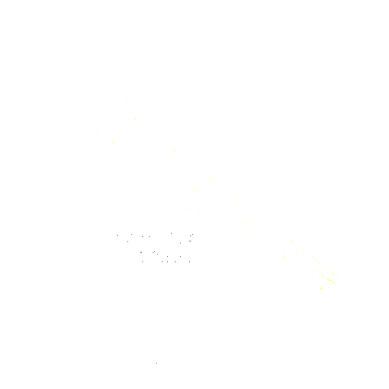

In [ ]:
first_record = emb_test_dataset.take(1)

# Iterate through the first record to view its contents
for prod_id,image,title,all_text_combined in first_record:
  print(type(image))
  print(title)
  image_np = image.numpy()

# Plot the image using matplotlib
  plt.imshow(image_np)
  plt.axis('off')
  plt.show()

DistilBERT is a smaller and faster version of BERT that has fewer parameters and requires less computational resources to train and run, making it more suitable for low-resource environments. Hence we decided to generate text embeddings using DistilBERT.

In [ ]:
model = SentenceTransformer('stsb-distilbert-base')
model.max_seq_length = 128

In [ ]:
##Function to create Text embeddings
def get_textEmbeddings(model,text):
    text_embedding = model.encode(text, convert_to_tensor=True)
    return text_embedding

We first tried Resnet and Efficient net to generate image embeddings but due to Lack of computational resources we went ahead with mobileNet. MobileNet is designed to have low computational complexity and memory requirements, making it well-suited for running on mobile and embedded devices with limited resources.Despite its small size, MobileNet has achieved high accuracy on various computer vision tasks, such as image classification, object detection, and semantic segmentation.

In [ ]:
IMG_SIZE = 224
size = (IMG_SIZE,IMG_SIZE)
img_model = tf.keras.applications.MobileNet(input_shape = (IMG_SIZE, IMG_SIZE, 3), include_top = False, weights = 'imagenet' )

In [ ]:
#Function to create Image embeddings
def get_imageEmbeddings(model, image):
    size = (224, 224) # set the target image size
    image = tf.keras.preprocessing.image.array_to_img(image, scale=False)
    image = image.resize(size)
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])
    img_embeddings = model(input_arr)
    meanImgEmb1 = np.mean(img_embeddings, axis=0)
    meanImgEmb2 = np.mean(meanImgEmb1, axis=0)
    meanImgEmb = np.mean(meanImgEmb2, axis=0)
    return meanImgEmb

In [ ]:
# Iterate over the Train dataset and extract the image and text data separately
%%time
text_embeddings_train={}
image_embeddings_train={}
for prod_id,image,title,all_text_combined,color_id,top_category_id,bottom_category_id in emb_train_dataset_clean:
    txt_emb = get_textEmbeddings(model,str(all_text_combined))
    img_emb = get_imageEmbeddings(img_model,image)
    text_embeddings_train[prod_id.numpy()] = txt_emb
    image_embeddings_train[prod_id.numpy()] = img_emb

In [ ]:
# Iterate over the Validation dataset and extract the image and text data separately
%%time
text_embeddings_val={}
image_embeddings_val={}
for prod_id,image,title,all_text_combined,color_id,top_category_id,bottom_category_id in emb_val_dataset_clean:
    txt_emb = get_textEmbeddings(model,str(all_text_combined))
    img_emb = get_imageEmbeddings(img_model,image)
    text_embeddings_val[prod_id.numpy()] = txt_emb
    image_embeddings_val[prod_id.numpy()] = img_emb

In [ ]:
# Iterate over the test dataset and extract the image and text data separately
%%time
text_embeddings_test={}
image_embeddings_test={}
for prod_id,image,title,all_text_combined in emb_test_dataset_clean:
    txt_emb = get_textEmbeddings(model,str(all_text_combined))
    img_emb = get_imageEmbeddings(img_model,image)
    text_embeddings_test[prod_id.numpy()] = txt_emb
    image_embeddings_test[prod_id.numpy()] = img_emb

CPU times: user 33min 52s, sys: 26.5 s, total: 34min 18s
Wall time: 34min 32s


In [ ]:
concatenated_embeddings_train = {}
for key in text_embeddings_train.keys():
    if key in image_embeddings_train:
        concatenated_embeddings_train[key] = np.concatenate((text_embeddings_train[key].cpu(), image_embeddings_train[key]), axis=0)


In [ ]:
concatenated_embeddings_val = {}
for key in text_embeddings_val.keys():
    if key in image_embeddings_val:
        concatenated_embeddings_val[key] = np.concatenate((text_embeddings_val[key].cpu(), image_embeddings_val[key]), axis=0)

In [ ]:
concatenated_embeddings_test = {}
for key in text_embeddings_test.keys():
    if key in image_embeddings_test:
        concatenated_embeddings_test[key] = np.concatenate((text_embeddings_test[key].cpu(), image_embeddings_test[key]), axis=0)

In [ ]:
import pickle
with open(f'{PATH}/first_embeddings_train_textEm','wb') as handle:
    pickle.dump(text_embeddings_test,handle)

In [ ]:
import pickle
with open(f'{PATH}/first_embeddings_val_textEm','wb') as handle:
    pickle.dump(text_embeddings_test,handle)

In [ ]:
import pickle
with open(f'{PATH}/first_embeddings_test_textEm','wb') as handle:
    pickle.dump(text_embeddings_test,handle)

In [ ]:
with open(f'{PATH}/first_embeddings_train_imageEm','wb') as handle:
    pickle.dump(image_embeddings_test,handle)

In [ ]:
with open(f'{PATH}/first_embeddings_val_imageEm','wb') as handle:
    pickle.dump(image_embeddings_test,handle)

In [ ]:
with open(f'{PATH}/first_embeddings_test_imageEm','wb') as handle:
    pickle.dump(image_embeddings_test,handle)

In [ ]:
def embeddings_tfrecords_writer(embeddings_dict,filepath):
  writer = tf.io.TFRecordWriter(f'{PATH}/{filepath}.tfrecords')

  # iterate through the embeddings dictionary
  for product_id, embedding in embeddings_dict.items():
      # create a feature dictionary
      feature = {'product_id': tf.train.Feature(int64_list=tf.train.Int64List(value=[product_id])),
                'embeddings': tf.train.Feature(float_list=tf.train.FloatList(value=embedding.tolist()))}
      
      # create an example protocol buffer
      example = tf.train.Example(features=tf.train.Features(feature=feature))
      
      # serialize the example to a string
      serialized = example.SerializeToString()
      
      # write the serialized example to the TFRecord file
      writer.write(serialized)

  # close the TFRecordWriter
  writer.close()

In [ ]:
for product_id, concatenated_embedding in concatenated_embeddings.items():
    embedding_dim = concatenated_embedding.shape[0]

In [ ]:
# create a TFRecordWriter object
embeddings_tfrecords_writer(concatenated_embeddings_train,'first_embeddings_concatenated_train')
embeddings_tfrecords_writer(concatenated_embeddings_val,'first_embeddings_concatenated_val')
embeddings_tfrecords_writer(concatenated_embeddings_test,'first_embeddings_concatenated_test')

In [ ]:
import tensorflow as tf

# Create two TFRecordDataset objects for the two input files
embeddings_file = f'{PATH}/embeddings.tfrecords' # Update with your embeddings file name
labels_file = tf_training_filenames  # Update with your labels file name

embeddings_dataset = tf.data.TFRecordDataset(embeddings_file)
labels_dataset = tf.data.TFRecordDataset(labels_file)

# Define a function to parse the records in the embeddings dataset
def parse_embeddings_record(record):
    # Define the features you expect in the embeddings dataset
    features = {
        'product_id': tf.io.FixedLenFeature([], dtype=tf.int64),
        'embeddings': tf.io.FixedLenFeature([1792], dtype=tf.float32),  # Update with your embedding dimension
    }
    # Parse the record using the features dictionary
    parsed_record = tf.io.parse_single_example(record, features)
    return parsed_record

# Define a function to parse the records in the labels dataset
def parse_labels_record(record):
    # Define the features you expect in the labels dataset
    features = {
        'product_id': tf.io.FixedLenFeature([], dtype=tf.int64),
        'color_id': tf.io.FixedLenFeature([], dtype=tf.int64),
    }

    
    # Parse the record using the features dictionary
    parsed_record = tf.io.parse_single_example(record, features)
    return parsed_record

# Apply the parsing functions to the datasets
embeddings_dataset = embeddings_dataset.map(parse_embeddings_record)
labels_dataset = labels_dataset.map(parse_labels_record)

# Define a function to combine the embeddings and labels datasets
def combine_datasets(embeddings, labels):
    # Extract the relevant information from the embeddings and labels datasets
    product_id = embeddings['product_id']
    embeddings = embeddings['embeddings']
    color_id = labels['color_id']
    label = tf.cast(tf.one_hot(color_id, 20), tf.int64)
    # Return a tuple with the combined information
    return embeddings, label

# Use the `combine_datasets` function to combine the embeddings and labels datasets
combined_dataset = tf.data.Dataset.zip((embeddings_dataset, labels_dataset)).map(combine_datasets)

# Now you can use the combined_dataset for further processing, such as batching, shuffling, etc.


In [ ]:
combined_dataset

<_MapDataset element_spec=(TensorSpec(shape=(1792,), dtype=tf.float32, name=None), TensorSpec(shape=(15,), dtype=tf.int64, name=None))>

In [ ]:
BATCH_SIZE = 128

In [ ]:
dataset = combined_dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(128, 1792), dtype=tf.float32, name=None), TensorSpec(shape=(128, 15), dtype=tf.int64, name=None))>

# Model Training



## Model 1: Predicting the **Top category**- Training Light GBM Model

LightGBM is a popular boosting tree algorithm that has several advantages over other boosting trees. It is known for its faster training speed, lower memory usage, and higher accuracy. It also has the ability to handle large-scale data and allows for parallel and GPU training. Hence we decided to train LightGBM on the top category

In [ ]:
df_training = pd.read_csv(f"{PATH}/df_training.csv")

In [ ]:
df_validation = pd.read_csv(f"{PATH}/df_validation.csv")

In [ ]:
df_training = df_training.replace(np.nan, '', regex=True)
df_validation = df_validation.replace(np.nan, '', regex=True)

In [ ]:
keywords_tags = [] 
for index,row in df_training.iterrows():
    comb_text = str(row['keywords'])+ " "+str(row['tags'])
    keywords_tags.append(comb_text)

In [ ]:
keywords_tags_val = [] 
for index,row in df_validation.iterrows():
    comb_text = str(row['keywords'])+ " "+str(row['tags'])
    keywords_tags_val.append(comb_text)

In [ ]:
df_training['keywords_tags']=keywords_tags 

In [ ]:
df_validation['keywords_tags']=keywords_tags_val

In [ ]:
lgb_clf = lgb.LGBMClassifier(objective='multiclass', 
                            num_class=15,    
                            seed=42,metric='multi_logloss')

In [ ]:
df_training.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,pattern,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text,all_text_info,keywords,keywords_tags
0,1345283755,"Happy New Home Card, Congratulations On Your N...",New Home Card designed and printed in EU on hi...,"personalised card,Moving Cards,For Friends,New...",physical,,,,,moving,...,,1283,paper_and_party_supplies.paper.greeting_cards....,10,paper_and_party_supplies,0,beige,"Happy New Home Card, Congratulations On Your N...",happy new home card congratulations housewarmi...,happy new home card congratulations housewarmi...
1,1179965649,Vintage Kids Brown Leather Oxford Shoes - Litt...,Vintage Kids Brown Leather Oxford Shoes - Yout...,"brown leather,school shoes,cute,toddler shoes,...",physical,,,,,,...,,1436,shoes.boys_shoes.oxfords_and_wingtips,12,shoes,4,brown,Vintage Kids Brown Leather Oxford Shoes - Litt...,vintage kids brown leather oxford shoes little...,vintage kids brown leather oxford shoes little...
2,219332186,"Shih Tzu, Dog Treat Jar, Personalized Pet, Sto...",Petzoup presents a custom hand painted pet tre...,"Shih Tzu,Shihtzu,dog treat jar,personalized pe...",physical,,,,,anniversary,...,,1388,pet_supplies.pet_feeding,11,pet_supplies,0,beige,"Shih Tzu, Dog Treat Jar, Personalized Pet, Sto...",shih tzu dog treat jar personalized pet storag...,shih tzu dog treat jar personalized pet storag...
3,1023279833,Beanie Babies Ty Animal Collection Collector&#...,"Birthday is \nAugust 28, 1997. \nStamped 502","Vintage,Beanie Babies,Ty,POUNCE,Cat,Kitten,Sta...",physical,,,,,baby shower,...,,2399,toys_and_games.toys.stuffed_animals_and_plushi...,13,toys_and_games,4,brown,Beanie Babies Ty Animal Collection Collector&#...,beanie babies ty animal collection collector &...,beanie babies ty animal collection collector &...
4,1123141297,"Zachary Levi Car Air Freshener, Actor Air Fres...",This is a handmade car air fresheners inspired...,"Celebrity,Present,Car,fun,actor,Shazam,Zachary...",physical,,,,,,...,,12419,electronics_and_accessories.car_parts_and_acce...,7,electronics_and_accessories,17,white,"Zachary Levi Car Air Freshener, Actor Air Fres...",zachary levi car air freshener actor shazam no...,zachary levi car air freshener actor shazam no...


In [ ]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', lgb_clf),
])

We will be training the LightGBM model on our preprocessed combined text Keywords and tags

In [ ]:
train_text = df_training['keywords_tags']                     #Train text for top category prediction

In [ ]:
train_labels = df_training['top_category_id'].values          #Train label for top category prediction

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
%%time
text_clf.fit(train_text, train_labels)                            #Train model for top category 

CPU times: user 1h 19min 15s, sys: 12.2 s, total: 1h 19min 27s
Wall time: 50min 56s


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 LGBMClassifier(metric='multi_logloss', num_class=15,
                                objective='multiclass', seed=42))])

In [ ]:
#Validation on top category text
val_text = df_validation['keywords_tags']
val_labels =  df_validation['top_category_id'].values       

In [ ]:
%%time
predictions = text_clf.predict(val_text)      #Predictions for top category

CPU times: user 36.7 s, sys: 120 ms, total: 36.8 s
Wall time: 26.1 s


In [ ]:
(predictions[:5])

array([ 0, 12,  8,  8, 13])

In [ ]:
f1 = metrics.f1_score(val_labels, predictions, average='weighted')

In [ ]:
f"F1 score: {f1:.4f}"

'F1 score: 0.8413'

In [ ]:
print(metrics.classification_report(val_labels, predictions))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1261
           1       0.76      0.58      0.65       874
           2       0.82      0.83      0.83       664
           3       0.87      0.85      0.86      1243
           4       0.88      0.86      0.87       738
           5       0.93      0.95      0.94      3203
           6       0.84      0.83      0.83      4235
           7       0.87      0.86      0.86       818
           8       0.81      0.89      0.84      5320
           9       0.83      0.88      0.85       946
          10       0.80      0.79      0.80      1081
          11       0.92      0.90      0.91       655
          12       0.95      0.95      0.95      1035
          13       0.86      0.80      0.83      1443
          14       0.71      0.58      0.64      1033

    accuracy                           0.84     24549
   macro avg       0.84      0.82      0.83     24549
weighted avg       0.84   

In [ ]:
file = f'{PATH}/trained_models/LGB_top_cat_trained.pkl'
pickle.dump(text_clf, open(file, 'wb'))
print('Trained LGB model was saved!')

Trained LGB model was saved!


## Taking Predictions from LightGBM for Top category

In [ ]:
df_test.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,all_text_info,keywords,keywords_tags
0,1323824090,12 Small Pressed Reddish-Orange Japanese Maple...,12 small pressed reddish-orange Japanese maple...,"Leaves,Art,Crafts,Paper crafts,Fall,Soap,Bookm...",physical,,floral arranging,,,,,,,,,12 Small Pressed Reddish-Orange Japanese Maple...,12 small pressed reddish orange japanese maple...,12 small pressed reddish orange japanese maple...
1,544175230,"Christmas artificial leaves, Holiday decor, Gl...",Glitter fake leaves.\nPrice for 5 leaves \nLea...,"Holiday decor,Glitter fake leaves,Faux greener...",physical,,floral arranging,,,,,,,,,"Christmas artificial leaves, Holiday decor, Gl...",christmas artificial leaves holiday decor glit...,christmas artificial leaves holiday decor glit...
2,895779370,Fresh Holly Leaves ( 50 count) - Christmas Gre...,This listing includes 50 fresh HOLLY Leaves Fr...,"lucky Holly leaves,Christmas Greenery,Christma...",physical,,floral arranging,,,,,,,,,Fresh Holly Leaves ( 50 count) - Christmas Gre...,fresh holly leaves 50 count christmas greenery...,fresh holly leaves 50 count christmas greenery...
3,641102090,"Christmas artificial greenery, Gold plants, Gl...",Glitter pine stems.\nPrice for 1 branch\nThe t...,"Glitter pine stems,Holiday decor,Christmas Cra...",physical,,floral arranging,,,,,,,,,"Christmas artificial greenery, Gold plants, Gl...",christmas artificial greenery gold plants glit...,christmas artificial greenery gold plants glit...
4,1340603160,Red crown of thorn corona thai Hybrid sale Cut...,Free shipping,"cactus live plant,Crown of thorns",physical,,,,,,,,,,,Red crown of thorn corona thai Hybrid sale Cut...,red crown thorn corona thai hybrid sale cuttin...,red crown thorn corona thai hybrid sale cuttin...


In [ ]:
X_test = df_test['keywords_tags']

In [ ]:
top_model = pickle.load(open(f'{PATH}/LGB_top_cat_trained.pkl', 'rb'))

In [ ]:
top_category_predictions = top_model.predict(X_test)

In [ ]:
top_category_predictions

array([6, 6, 6, ..., 4, 4, 4])

In [ ]:
df_test['top_category_predictions'] = top_category_predictions

In [ ]:
df_test.to_csv(f'{PATH}/df_predictions')

## Model 2: Predicting the **Bottom category** with K-Nearest Neighbour Classifier.

In [ ]:
train_text = df_training['keywords_tags']

In [ ]:
train_labels = df_training['bottom_category_id'].values

In [ ]:
vectorizer = TfidfVectorizer()

# Convert the training data into numerical vectors
X_train = vectorizer.fit_transform(train_text)
y_train = train_labels 

# Initialize the KNN classifier with partial fit
knn = KNeighborsClassifier(n_neighbors=5, algorithm='brute', metric='euclidean', weights='distance')

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', metric='euclidean', weights='distance')

In [ ]:
val_text = df_validation['keywords_tags']
val_labels = df_validation['bottom_category_id'].values

In [ ]:
X_val = vectorizer.transform(val_text)

In [ ]:
# Predict the labels for the test data
y_pred = knn.predict(X_val)


In [ ]:
# Evaluate the performance of the classifier
accuracy = np.mean(y_pred == val_labels )
print(f"Accuracy: {accuracy}")

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
text_clf = Pipeline
([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier()),
])

# Define the parameter grid for the grid search
param_grid = {
    'clf__n_neighbors': [3, 5, 7, 9, 11],
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan', 'cosine'],
}

# Perform a grid search to find the optimal hyperparameters
grid_search = GridSearchCV(text_clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(train_text, train_labels)

# Print the best hyperparameters and the corresponding cross-validation score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Cross-validation score: {grid_search.best_score_}")



In [ ]:
# Define the parameter grid for the grid search
param_grid = {
    'clf__n_neighbors': [ 5],
    'clf__weights': ['distance'],
    'clf__metric': ['euclidean'],
}


In [ ]:
grid_search = GridSearchCV(text_clf, param_grid=param_grid, cv=5)
grid_search.fit(train_text, train_labels)


In [ ]:
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Cross-validation score: {grid_search.best_score_}")


## Taking Predictions from K-Nearest Neighbour for Bottom category




In [ ]:
import pickle
pickle.dump(text_clf, open(f'{PATH}/KNN-BOTTOM-CAT-model.pkl', 'wb'))

In [ ]:
val_text = keywords_tags_val 
val_labels = df_validation['bottom_category_id'].values

In [ ]:
predictions = text_clf.predict(val_text)

In [ ]:
f1 = metrics.f1_score(val_labels, predictions, average='weighted')

In [ ]:
f"F1 score: {f1:.4f}"

'F1 score: 0.5537'

In [ ]:
df_predictions=pd.read_csv(f'{PATH}/df_predictions')


In [ ]:
df_predictions

,Unnamed: 0,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,all_text_info,keywords,keywords_tags,top_category_predictions
0,0,1323824090,12 Small Pressed Reddish-Orange Japanese Maple...,12 small pressed reddish-orange Japanese maple...,"Leaves,Art,Crafts,Paper crafts,Fall,Soap,Bookm...",physical,NaN,floral arranging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12 Small Pressed Reddish-Orange Japanese Maple...,12 small pressed reddish orange japanese maple...,12 small pressed reddish orange japanese maple...,6
1,1,544175230,"Christmas artificial leaves, Holiday decor, Gl...",Glitter fake leaves.\nPrice for 5 leaves \nLea...,"Holiday decor,Glitter fake leaves,Faux greener...",physical,NaN,floral arranging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Christmas artificial leaves, Holiday decor, Gl...",christmas artificial leaves holiday decor glit...,christmas artificial leaves holiday decor glit...,6
2,2,895779370,Fresh Holly Leaves ( 50 count) - Christmas Gre...,This listing includes 50 fresh HOLLY Leaves Fr...,"lucky Holly leaves,Christmas Greenery,Christma...",physical,NaN,floral arranging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fresh Holly Leaves ( 50 count) - Christmas Gre...,fresh holly leaves 50 count christmas greenery...,fresh holly leaves 50 count christmas greenery...,6
3,3,641102090,"Christmas artificial greenery, Gold plants, Gl...",Glitter pine stems.\nPrice for 1 branch\nThe t...,"Glitter pine stems,Holiday decor,Christmas Cra...",physical,NaN,floral arranging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Christmas artificial greenery, Gold plants, Gl...",christmas artificial greenery gold plants glit...,christmas artificial greenery gold plants glit...,6
4,4,1340603160,Red crown of thorn corona thai Hybrid sale Cut...,Free shipping,"cactus live plant,Crown of thorns",physical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red crown of thorn corona thai Hybrid sale Cut...,red crown thorn corona thai hybrid sale cuttin...,red crown thorn corona thai hybrid sale cuttin...,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27114,170,809100810,A Book of 1000 Things by George Stimpson,Vintage A Book About A Thousand Things George ...,NaN,physical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Book of 1000 Things by George Stimpson Vinta...,book 1000 things george stimpson vintage thous...,book 1000 things george stimpson vintage thous...,4
27115,171,1358895140,Vintage Story of Sugar in Hawaii Softcover Boo...,The Story of Sugar in Hawaii\n\nPublished by T...,"Vintage,Hawaii,Sugar,History,Hawaiian,1926,Fir...",physical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vintage Story of Sugar in Hawaii Softcover Boo...,vintage story sugar hawaii softcover book hawa...,vintage story sugar hawaii softcover book hawa...,4
27116,172,1366768240,"Francis King, The Man on the Rock, Vintage Pen...",The Man on the Rock (1957) was the seventh nov...,"Penguin books,1960s penguin,book lover gift,19...",physical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Francis King, The Man on the Rock, Vintage Pen...",francis king man rock vintage penguin books fi...,francis king man rock vintage penguin books fi...,4
27117,173,1168372040,Children of the Abbey (1840&#39;s) Regina Roch...,"A charming, early Victorian antique edition of...","children of abbey,regina maria roche,regina ro...",physical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Children of the Abbey (1840&#39;s) Regina Roch...,children abbey 1840 &# 39 regina roche three v...,children abbey 1840 &# 39 regina roche three v...,4


In [ ]:
X_testing = vectorizer.transform(df_predictions["keywords_tags"])

In [ ]:
df_predictions['bottom_category_predictions'] = knn.predict(X_testing)

In [ ]:
df_predictions.to_csv(f'{PATH}df_predictions.csv', index=False)

## Model 3: Predicting the **Color** 


## Training a Model on concatenated Embeddings of text and image

In [ ]:
import tensorflow as tf

def create_label_embeddings_dataset(filepath,labels_file):

  # Create two TFRecordDataset objects for the two input files
  embeddings_file =f'{PATH}/{filepath}' # Update with your embeddings file name
  labels_file = labels_file # Update with your labels file name

  embeddings_dataset = tf.data.TFRecordDataset(embeddings_file)
  labels_dataset = tf.data.TFRecordDataset(labels_file)

  # Define a function to parse the records in the embeddings dataset
  def parse_embeddings_record(record):
      # Define the features you expect in the embeddings dataset
      features = {
          'product_id': tf.io.FixedLenFeature([], dtype=tf.int64),
          'embeddings': tf.io.FixedLenFeature([1792], dtype=tf.float32),  # Update with your embedding dimension
      }
      # Parse the record using the features dictionary
      parsed_record = tf.io.parse_single_example(record, features)
      return parsed_record

  # Define a function to parse the records in the labels dataset
  def parse_labels_record(record):
      # Define the features you expect in the labels dataset
      features = {
          'product_id': tf.io.FixedLenFeature([], dtype=tf.int64),
          'color_id': tf.io.FixedLenFeature([], dtype=tf.int64),
      }

      
      # Parse the record using the features dictionary
      parsed_record = tf.io.parse_single_example(record, features)
      return parsed_record

  # Apply the parsing functions to the datasets
  embeddings_dataset = embeddings_dataset.map(parse_embeddings_record)
  labels_dataset = labels_dataset.map(parse_labels_record)

  # Define a function to combine the embeddings and labels datasets
  def combine_datasets(embeddings, labels):
      # Extract the relevant information from the embeddings and labels datasets
      product_id = embeddings['product_id']
      embeddings = embeddings['embeddings']
      color_id = labels['color_id']
      label = tf.cast(tf.one_hot(color_id, 20), tf.int64)
    
      # Return a tuple with the combined information
      return embeddings, label

  # Use the `combine_datasets` function to combine the embeddings and labels datasets
  combined_dataset = tf.data.Dataset.zip((embeddings_dataset, labels_dataset)).map(combine_datasets)
  return combined_dataset 
# Now you can use the combined_dataset for further processing, such as batching, shuffling, etc.


In [ ]:
combined_dataset_train=create_label_embeddings_dataset('first_embeddings_train.tfrecords',tf_training_filenames)

In [ ]:
combined_dataset_val=create_label_embeddings_dataset('first_embeddings_val.tfrecords',tf_validation_filenames)

In [ ]:
 def parse_embeddings_record(record):
      # Define the features you expect in the embeddings dataset
      features = {
          'product_id': tf.io.FixedLenFeature([], dtype=tf.int64),
          'embeddings': tf.io.FixedLenFeature([1792], dtype=tf.float32),  # Update with your embedding dimension
      }
      # Parse the record using the features dictionary
      parsed_record = tf.io.parse_single_example(record, features)
      return parsed_record

test_embeddings_file ='/content/drive/MyDrive/etsy-data/first_embeddings_concatenated_test.tfrecords'

In [ ]:
test_embeddings_dataset = tf.data.TFRecordDataset(test_embeddings_file)

In [ ]:
test_embeddings_dataset = test_embeddings_dataset.map(parse_embeddings_record)

In [ ]:
BATCH_SIZE = 128

In [ ]:
train_dataset = combined_dataset_train.batch(BATCH_SIZE, drop_remainder=True)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
val_dataset = combined_dataset_val.batch(BATCH_SIZE, drop_remainder=True)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
test_dataset=test_embeddings_dataset.batch(BATCH_SIZE)

In [ ]:
test_dataset= test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
first_record = next(iter(train_dataset.take(1)))

# Accessing the inputs and outputs of the first record
inputs, outputs = first_record

# Printing the shape of the inputs tensor
print(inputs.shape)

# Printing the shape of the outputs tensor
print(outputs.shape)


In [ ]:
first_record = next(iter(val_dataset.take(1)))

# Accessing the inputs and outputs of the first record
inputs, outputs = first_record

# Printing the shape of the inputs tensor
print(inputs.shape)

# Printing the shape of the outputs tensor
print(outputs.shape)


(128, 1792)
(128, 20)


In [ ]:
first_record = next(iter(test_dataset.take(1)))

print(first_record)

{'embeddings': <tf.Tensor: shape=(128, 1792), dtype=float32, numpy=
array([[ 5.3212708e-01,  1.8495965e-01,  8.2746583e-01, ...,
         8.8210503e-04,  0.0000000e+00,  0.0000000e+00],
       [ 6.5806079e-01,  4.9300379e-01,  1.1044971e+00, ...,
         0.0000000e+00,  4.6571519e-02,  0.0000000e+00],
       [ 3.4089515e-01, -1.3973522e-01,  4.3245059e-01, ...,
         8.8210503e-04,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 7.1125442e-01, -2.0627666e-01,  1.9961147e-02, ...,
         4.1366789e-01,  1.5037043e-01,  0.0000000e+00],
       [-1.4542149e-01, -1.3801621e-01,  2.5809252e-01, ...,
         8.8210503e-04,  0.0000000e+00,  0.0000000e+00],
       [ 3.6176896e-01,  1.7755991e-01,  4.1086179e-01, ...,
         8.8210503e-04,  0.0000000e+00,  0.0000000e+00]], dtype=float32)>, 'product_id': <tf.Tensor: shape=(128,), dtype=int64, numpy=
array([ 229676010,  839351150,  719328920,  270042120,  524411800,
        967775890,  637335660, 1387636600, 1252811030,  238621840,


In [ ]:
strategy = tf.distribute.MirroredStrategy()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_filepath = f"{PATH}/first_model_emb_RMSprop"

with strategy.scope():
    input_shape = (None,128,1792)
    inputs = tf.keras.layers.Input(shape=input_shape, dtype=tf.float32, name="embeddings")
    x=inputs
    x = Dense(256, activation='relu')(x)
    x=tf.keras.layers.Dropout(rate=.45, seed=123)(x)    
    output=Dense(20, activation='softmax')(x)
    model=Model(inputs=inputs, outputs=output)
    model.compile(tf.optimizers.Adamax(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Define ModelCheckpoint callback to save model after each epoch
    checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False,
        save_best_only=False,
        monitor="val_loss",
        mode="min",
        save_freq="epoch",
        verbose=1,
    )

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
epochs = 80
early_stopping = EarlyStopping(
    monitor='val_loss', # the metric to monitor
    patience=5, # number of epochs with no improvement after which training will be stopped
    restore_best_weights=True, # restore the weights of the best epoch
)

hist = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset,
    callbacks=[early_stopping,checkpoint_callback], # pass the callback to the fit method
    verbose=1)

Epoch 1/80
   1546/Unknown - 136s 87ms/step - loss: 2.6552 - accuracy: 0.2005
Epoch 1: saving model to /content/drive/MyDrive/etsy-data/checkpoints
1546/1546 [==============================] - 177s 114ms/step - loss: 2.6552 - accuracy: 0.2005 - val_loss: 2.3939 - val_accuracy: 0.2764
Epoch 2/80
1546/1546 [==============================] - ETA: 0s - loss: 2.4177 - accuracy: 0.2704
Epoch 2: saving model to /content/drive/MyDrive/etsy-data/checkpoints
1546/1546 [==============================] - 203s 131ms/step - loss: 2.4177 - accuracy: 0.2704 - val_loss: 2.2769 - val_accuracy: 0.3129
Epoch 3/80
1546/1546 [==============================] - ETA: 0s - loss: 2.3227 - accuracy: 0.2999
Epoch 3: saving model to /content/drive/MyDrive/etsy-data/checkpoints
1546/1546 [==============================] - 208s 134ms/step - loss: 2.3227 - accuracy: 0.2999 - val_loss: 2.2116 - val_accuracy: 0.3311
Epoch 4/80
1546/1546 [==============================] - ETA: 0s - loss: 2.2614 - accuracy: 0.3182
Epoch 4

UnknownError: ignored

## Taking Predictions For Colour using concatenated embeddings of text and Image

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/etsy-data/first_model_emb_RMSprop')

In [ ]:
loaded_model.evaluate(val_dataset, batch_size=BATCH_SIZE, verbose=1)

In [ ]:
predictions=loaded_model.predict(test_dataset,batch_size=BATCH_SIZE, verbose=1)

     17/Unknown - 0s 6ms/step

/usr/local/lib/python3.9/dist-packages/keras/engine/functional.py:639: UserWarning: Input dict contained keys ['product_id'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


212/212 [==============================] - 1s 6ms/step


In [ ]:
predictions.shape

(27119, 20)

In [ ]:
type(predictions)

numpy.ndarray

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
predicted_labels

array([ 7,  5,  7, ...,  7, 16,  1])

In [ ]:
df_predition_submission.head()

,product_id,top_category_predictions,bottom_category_predictions
0,1323824090,6,6883
1,544175230,6,6883
2,895779370,6,6863
3,641102090,6,6883
4,1340603160,8,6883


In [ ]:
len(predicted_labels)

27119

In [ ]:
df_test=pd.read_csv(f'{PATH}/df_test.csv')

In [ ]:
df_predition_submission=pd.read_csv(f'{PATH}/df_prediction_submission.csv')

In [ ]:
df_test

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,all_text_info,keywords,keywords_tags
0,1323824090,12 Small Pressed Reddish-Orange Japanese Maple...,12 small pressed reddish-orange Japanese maple...,"Leaves,Art,Crafts,Paper crafts,Fall,Soap,Bookm...",physical,NaN,floral arranging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12 Small Pressed Reddish-Orange Japanese Maple...,12 small pressed reddish orange japanese maple...,12 small pressed reddish orange japanese maple...
1,544175230,"Christmas artificial leaves, Holiday decor, Gl...",Glitter fake leaves.\nPrice for 5 leaves \nLea...,"Holiday decor,Glitter fake leaves,Faux greener...",physical,NaN,floral arranging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Christmas artificial leaves, Holiday decor, Gl...",christmas artificial leaves holiday decor glit...,christmas artificial leaves holiday decor glit...
2,895779370,Fresh Holly Leaves ( 50 count) - Christmas Gre...,This listing includes 50 fresh HOLLY Leaves Fr...,"lucky Holly leaves,Christmas Greenery,Christma...",physical,NaN,floral arranging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fresh Holly Leaves ( 50 count) - Christmas Gre...,fresh holly leaves 50 count christmas greenery...,fresh holly leaves 50 count christmas greenery...
3,641102090,"Christmas artificial greenery, Gold plants, Gl...",Glitter pine stems.\nPrice for 1 branch\nThe t...,"Glitter pine stems,Holiday decor,Christmas Cra...",physical,NaN,floral arranging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Christmas artificial greenery, Gold plants, Gl...",christmas artificial greenery gold plants glit...,christmas artificial greenery gold plants glit...
4,1340603160,Red crown of thorn corona thai Hybrid sale Cut...,Free shipping,"cactus live plant,Crown of thorns",physical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red crown of thorn corona thai Hybrid sale Cut...,red crown thorn corona thai hybrid sale cuttin...,red crown thorn corona thai hybrid sale cuttin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27114,809100810,A Book of 1000 Things by George Stimpson,Vintage A Book About A Thousand Things George ...,NaN,physical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Book of 1000 Things by George Stimpson Vinta...,book 1000 things george stimpson vintage thous...,book 1000 things george stimpson vintage thous...
27115,1358895140,Vintage Story of Sugar in Hawaii Softcover Boo...,The Story of Sugar in Hawaii\n\nPublished by T...,"Vintage,Hawaii,Sugar,History,Hawaiian,1926,Fir...",physical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vintage Story of Sugar in Hawaii Softcover Boo...,vintage story sugar hawaii softcover book hawa...,vintage story sugar hawaii softcover book hawa...
27116,1366768240,"Francis King, The Man on the Rock, Vintage Pen...",The Man on the Rock (1957) was the seventh nov...,"Penguin books,1960s penguin,book lover gift,19...",physical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Francis King, The Man on the Rock, Vintage Pen...",francis king man rock vintage penguin books fi...,francis king man rock vintage penguin books fi...
27117,1168372040,Children of the Abbey (1840&#39;s) Regina Roch...,"A charming, early Victorian antique edition of...","children of abbey,regina maria roche,regina ro...",physical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Children of the Abbey (1840&#39;s) Regina Roch...,children abbey 1840 &# 39 regina roche three v...,children abbey 1840 &# 39 regina roche three v...


In [ ]:
df_predition_submission['color_embeddings_prediction']=predicted_labels.tolist()

In [ ]:
df_predition_submission

,product_id,top_category_predictions,bottom_category_predictions,color_embeddings_prediction
0,1323824090,6,6883,7
1,544175230,6,6883,5
2,895779370,6,6863,7
3,641102090,6,6883,7
4,1340603160,8,6883,16
...,...,...,...,...
27114,809100810,4,1160,7
27115,1358895140,4,1119,4
27116,1366768240,4,347,7
27117,1168372040,4,351,16


In [ ]:
df_predition_submission.to_csv(f'{PATH}/df_prediction_submission.csv')

## Training LightGBM Model for Colour Prediction 

In [ ]:
df_training.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,pattern,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text,all_text_info,keywords,keywords_tags
0,1345283755,"Happy New Home Card, Congratulations On Your N...",New Home Card designed and printed in EU on hi...,"personalised card,Moving Cards,For Friends,New...",physical,,,,,moving,...,,1283,paper_and_party_supplies.paper.greeting_cards....,10,paper_and_party_supplies,0,beige,"Happy New Home Card, Congratulations On Your N...",happy new home card congratulations housewarmi...,happy new home card congratulations housewarmi...
1,1179965649,Vintage Kids Brown Leather Oxford Shoes - Litt...,Vintage Kids Brown Leather Oxford Shoes - Yout...,"brown leather,school shoes,cute,toddler shoes,...",physical,,,,,,...,,1436,shoes.boys_shoes.oxfords_and_wingtips,12,shoes,4,brown,Vintage Kids Brown Leather Oxford Shoes - Litt...,vintage kids brown leather oxford shoes little...,vintage kids brown leather oxford shoes little...
2,219332186,"Shih Tzu, Dog Treat Jar, Personalized Pet, Sto...",Petzoup presents a custom hand painted pet tre...,"Shih Tzu,Shihtzu,dog treat jar,personalized pe...",physical,,,,,anniversary,...,,1388,pet_supplies.pet_feeding,11,pet_supplies,0,beige,"Shih Tzu, Dog Treat Jar, Personalized Pet, Sto...",shih tzu dog treat jar personalized pet storag...,shih tzu dog treat jar personalized pet storag...
3,1023279833,Beanie Babies Ty Animal Collection Collector&#...,"Birthday is \nAugust 28, 1997. \nStamped 502","Vintage,Beanie Babies,Ty,POUNCE,Cat,Kitten,Sta...",physical,,,,,baby shower,...,,2399,toys_and_games.toys.stuffed_animals_and_plushi...,13,toys_and_games,4,brown,Beanie Babies Ty Animal Collection Collector&#...,beanie babies ty animal collection collector &...,beanie babies ty animal collection collector &...
4,1123141297,"Zachary Levi Car Air Freshener, Actor Air Fres...",This is a handmade car air fresheners inspired...,"Celebrity,Present,Car,fun,actor,Shazam,Zachary...",physical,,,,,,...,,12419,electronics_and_accessories.car_parts_and_acce...,7,electronics_and_accessories,17,white,"Zachary Levi Car Air Freshener, Actor Air Fres...",zachary levi car air freshener actor shazam no...,zachary levi car air freshener actor shazam no...


In [ ]:
def check_color(color):
    try:
        Color(color)
        return Color(color)
    except ValueError:
        return("")

In [ ]:
check_color('')

<Color black>

In [ ]:
color_list = [] 
from colour import Color
for index,row in df_training.iterrows():
    comb_text = str(row['description'])+ " "+str(row['tags'])+" "+str(row['title'])
    comb_text = re.sub('#*', '', comb_text)
    _color = [i for i in str(comb_text).split(' ') if check_color(i)]
    color_list.append(_color)

In [ ]:
my_list = color_list

for i in range(len(my_list)):
    if my_list[i] == []:
        my_list[i] = 'other'
    else:
        my_list[i] = " ".join(my_list[i])

In [ ]:
df_training['colour_list'] = my_list

In [ ]:
df_training.head(5)

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,bottom_category_text,top_category_id,top_category_text,color_id,color_text,all_text_info,keywords,keywords_tags,colour_list,color_tags_train
0,1345283755,"Happy New Home Card, Congratulations On Your N...",New Home Card designed and printed in EU on hi...,"personalised card,Moving Cards,For Friends,New...",physical,,,,,moving,...,paper_and_party_supplies.paper.greeting_cards....,10,paper_and_party_supplies,0,beige,"Happy New Home Card, Congratulations On Your N...",happy new home card congratulations housewarmi...,happy new home card congratulations housewarmi...,other,"other personalised card,Moving Cards,For Frien..."
1,1179965649,Vintage Kids Brown Leather Oxford Shoes - Litt...,Vintage Kids Brown Leather Oxford Shoes - Yout...,"brown leather,school shoes,cute,toddler shoes,...",physical,,,,,,...,shoes.boys_shoes.oxfords_and_wingtips,12,shoes,4,brown,Vintage Kids Brown Leather Oxford Shoes - Litt...,vintage kids brown leather oxford shoes little...,vintage kids brown leather oxford shoes little...,Brown Brown brown Brown,"Brown Brown brown Brown brown leather,schoo..."
2,219332186,"Shih Tzu, Dog Treat Jar, Personalized Pet, Sto...",Petzoup presents a custom hand painted pet tre...,"Shih Tzu,Shihtzu,dog treat jar,personalized pe...",physical,,,,,anniversary,...,pet_supplies.pet_feeding,11,pet_supplies,0,beige,"Shih Tzu, Dog Treat Jar, Personalized Pet, Sto...",shih tzu dog treat jar personalized pet storag...,shih tzu dog treat jar personalized pet storag...,other,"other Shih Tzu,Shihtzu,dog treat jar,personali..."
3,1023279833,Beanie Babies Ty Animal Collection Collector&#...,"Birthday is \nAugust 28, 1997. \nStamped 502","Vintage,Beanie Babies,Ty,POUNCE,Cat,Kitten,Sta...",physical,,,,,baby shower,...,toys_and_games.toys.stuffed_animals_and_plushi...,13,toys_and_games,4,brown,Beanie Babies Ty Animal Collection Collector&#...,beanie babies ty animal collection collector &...,beanie babies ty animal collection collector &...,other,"other Vintage,Beanie Babies,Ty,POUNCE,Cat,Kitt..."
4,1123141297,"Zachary Levi Car Air Freshener, Actor Air Fres...",This is a handmade car air fresheners inspired...,"Celebrity,Present,Car,fun,actor,Shazam,Zachary...",physical,,,,,,...,electronics_and_accessories.car_parts_and_acce...,7,electronics_and_accessories,17,white,"Zachary Levi Car Air Freshener, Actor Air Fres...",zachary levi car air freshener actor shazam no...,zachary levi car air freshener actor shazam no...,,"Celebrity,Present,Car,fun,actor,Shazam,Zachar..."


In [ ]:
color_list = [] 
from colour import Color
for index,row in df_validation.iterrows():
    comb_text = str(row['description'])+ " "+str(row['tags'])+" "+str(row['title'])
    comb_text = re.sub('#*', '', comb_text)
    _color = [i for i in str(comb_text).split(' ') if check_color(i)]
    color_list.append(_color)

In [ ]:
my_list = color_list

for i in range(len(my_list)):
    if my_list[i] == []:
        my_list[i] = 'other'
    else:
        my_list[i] = " ".join(my_list[i])

In [ ]:
df_validation['colour_list']=my_list

In [ ]:
df_validation.tail()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,bottom_category_text,top_category_id,top_category_text,color_id,color_text,all_text_info,keywords,keywords_tags,colour_list,color_tags_val
24544,1164944528,Aluminum Upgrade band saw table insert for SEA...,WCM Products are Made in the USA!!!\n\nATTENTI...,"craftsman,113,band saw,insert,woodworking",physical,,,,,,...,craft_supplies_and_tools.tools_and_equipment.e...,6,craft_supplies_and_tools,16,silver,Aluminum Upgrade band saw table insert for SEA...,aluminum upgrade band saw table insert sears c...,aluminum upgrade band saw table insert sears c...,,"craftsman,113,band saw,insert,woodworking"
24545,1097540776,"Conch Sea Shell, Altar Piece, Sea Witch, Natur...",This very beautiful large Conch sea shell woul...,"conch shell,curio,natural,sea witch,bathroom,h...",physical,,,,,,...,home_and_living.spirituality_and_religion.natu...,8,home_and_living,10,orange,"Conch Sea Shell, Altar Piece, Sea Witch, Natur...",conch sea shell altar piece witch natural curi...,conch sea shell altar piece witch natural curi...,other,"other conch shell,curio,natural,sea witch,bath..."
24546,1050745268,Blue Ocean Crocheted Beaded Glove - Child (Rt ...,This vibrant ocean blue crocheted beaded glove...,"belly,dance,beaded,Accessory,crochet,blue,merm...",physical,,,,,,...,clothing.girls_clothing.costumes,5,clothing,2,blue,Blue Ocean Crocheted Beaded Glove - Child (Rt ...,blue ocean crocheted beaded glove child rt han...,blue ocean crocheted beaded glove child rt han...,blue blue purple blue blue Blue,"blue blue purple blue blue Blue belly,dance,b..."
24547,1406798455,Gift for him Indian Cultural Men&#39;s Wear Tr...,Solid Color Indian Handmade Short Shirt or Kur...,"Clothing,Men's kurta,Men's Clothes,Traditional...",physical,,,,,,...,clothing.mens_clothing.shirts_and_tees.kurtas,5,clothing,17,white,Gift for him Indian Cultural Men&#39;s Wear Tr...,gift indian cultural men &# 39 wear traditiona...,gift indian cultural men &# 39 wear traditiona...,other,"other Clothing,Men's kurta,Men's Clothes,Tradi..."
24548,750034394,Black Bra See Through Bra Lace Bra Sheer Bra E...,Black Bra See Through Bra Lace Bra Sheer Bra E...,"black lace bra,balcony bra,black bra,sheer bra...",physical,,,,,,...,clothing.womens_clothing.lingerie.bras,5,clothing,1,black,Black Bra See Through Bra Lace Bra Sheer Bra E...,black bra see lace sheer erotic mesh trough li...,black bra see lace sheer erotic mesh trough li...,Black black Black,"Black black Black black lace bra,balcony bra,b..."


In [ ]:
color_tags_train = [] 
for index,row in df_training.iterrows():
    comb_text = str(row['colour_list'])+ " "+str(row['tags'])
    color_tags_train.append(comb_text)

In [ ]:
color_tags_val = [] 
for index,row in df_validation.iterrows():
    comb_text = str(row['colour_list'])+ " "+str(row['tags'])
    color_tags_val.append(comb_text)

In [ ]:
df_training['color_tags_train']=color_tags_train

In [ ]:
df_validation['color_tags_val']=color_tags_val

In [ ]:
df_training.to_csv(f'{PATH}/df_training.csv', index=False)

In [ ]:
df_validation.to_csv(f'{PATH}/df_validation.csv', index=False)

In [ ]:
lgb_clf = lgb.LGBMClassifier(objective='multiclass', 
                            num_class=20,
                            n_jobs=8,
                            seed=42,metric='multi_logloss')

In [ ]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', lgb_clf),
])

In [ ]:
text_clf.fit(df_training['color_tags_train'], df_training['color_id'])  

[22:26:54] WARNING: ../src/learner.cc:767: 
Parameters: { "metric" } are not used.



In [ ]:
file = f'{PATH}/LGB_color_trained.pkl'
pickle.dump(text_clf, open(file, 'wb'))
print('Trained LGB model was saved!')

In [ ]:
predictions_bt = text_clf.predict(df_validation['color_tags_val'])

In [ ]:
f1 = metrics.f1_score(df_validation['color_id'], predictions_bt, average='weighted')

In [ ]:
f1

0.518408364341632

## Taking Predictions from LightGBM on color category

In [ ]:
df_test.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,all_text_info,keywords,keywords_tags,colour_list,color_tags_test
0,1323824090,12 Small Pressed Reddish-Orange Japanese Maple...,12 small pressed reddish-orange Japanese maple...,"Leaves,Art,Crafts,Paper crafts,Fall,Soap,Bookm...",physical,NaN,floral arranging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12 Small Pressed Reddish-Orange Japanese Maple...,12 small pressed reddish orange japanese maple...,12 small pressed reddish orange japanese maple...,other,"other Leaves,Art,Crafts,Paper crafts,Fall,Soap..."
1,544175230,"Christmas artificial leaves, Holiday decor, Gl...",Glitter fake leaves.\nPrice for 5 leaves \nLea...,"Holiday decor,Glitter fake leaves,Faux greener...",physical,NaN,floral arranging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Christmas artificial leaves, Holiday decor, Gl...",christmas artificial leaves holiday decor glit...,christmas artificial leaves holiday decor glit...,other,"other Holiday decor,Glitter fake leaves,Faux g..."
2,895779370,Fresh Holly Leaves ( 50 count) - Christmas Gre...,This listing includes 50 fresh HOLLY Leaves Fr...,"lucky Holly leaves,Christmas Greenery,Christma...",physical,NaN,floral arranging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fresh Holly Leaves ( 50 count) - Christmas Gre...,fresh holly leaves 50 count christmas greenery...,fresh holly leaves 50 count christmas greenery...,...,...
3,641102090,"Christmas artificial greenery, Gold plants, Gl...",Glitter pine stems.\nPrice for 1 branch\nThe t...,"Glitter pine stems,Holiday decor,Christmas Cra...",physical,NaN,floral arranging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Christmas artificial greenery, Gold plants, Gl...",christmas artificial greenery gold plants glit...,christmas artificial greenery gold plants glit...,Gold,"Gold Glitter pine stems,Holiday decor,Christma..."
4,1340603160,Red crown of thorn corona thai Hybrid sale Cut...,Free shipping,"cactus live plant,Crown of thorns",physical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red crown of thorn corona thai Hybrid sale Cut...,red crown thorn corona thai hybrid sale cuttin...,red crown thorn corona thai hybrid sale cuttin...,Red,"Red cactus live plant,Crown of thorns"


In [ ]:
color_list = [] 
from colour import Color
for index,row in df_test.iterrows():
    comb_text = str(row['description'])+ " "+str(row['tags'])+" "+str(row['title'])
    comb_text = re.sub('#*', '', comb_text)
    _color = [i for i in str(comb_text).split(' ') if check_color(i)]
    color_list.append(_color)

In [ ]:
my_list = color_list

for i in range(len(my_list)):
    if my_list[i] == []:
        my_list[i] = 'other'
    else:
        my_list[i] = " ".join(my_list[i])

In [ ]:
df_test['colour_list'] = my_list

In [ ]:
color_tags_test = [] 
for index,row in df_test.iterrows():
    comb_text = str(row['colour_list'])+ " "+str(row['tags'])
    color_tags_test.append(comb_text)

In [ ]:
df_test['color_tags_test']=color_tags_test

In [ ]:
file = f'{PATH}/LGB_color_trained.pkl'
loaded_model = pickle.load(open(file, 'rb'))


In [ ]:
predictions=loaded_model.predict(df_test['color_tags_test'])

In [ ]:
df_predition_submission['color_lgbm_predictions']=predictions

In [ ]:
df_test['colour_list'].nunique()

8272

In [ ]:
df_predition_submission

,product_id,top_category_predictions,bottom_category_predictions,color_embeddings_prediction,color_lgbm_predictions
0,1323824090,6,6883,7,14
1,544175230,6,6883,5,9
2,895779370,6,6863,7,9
3,641102090,6,6883,7,9
4,1340603160,8,6883,16,14
...,...,...,...,...,...
27114,809100810,4,1160,7,17
27115,1358895140,4,1119,4,17
27116,1366768240,4,347,7,1
27117,1168372040,4,351,16,17


## Creating an Ensemble of two classifiers for Color Category

Our ensemble approach consisted of
two models, namely LightGBM and Neural Network built on
concatenated embeddings. We utilized the predictions from
LightGBM when the color was explicitly stated in the title,
tags, or description of the product. However, when color
was not mentioned in any of these fields, we employed the
4
model based on concatenated embeddings to predict the color
category.

In [ ]:
df_ensemble=pd.merge(df_test[['product_id','colour_list']],df_predition_submission, on='product_id', how='inner')

In [ ]:
df_ensemble

,product_id,colour_list,top_category_predictions,bottom_category_predictions,color_embeddings_prediction,color_lgbm_predictions
0,1323824090,other,6,6883,7,14
1,544175230,other,6,6883,5,9
2,895779370,...,6,6863,7,9
3,641102090,Gold,6,6883,7,9
4,1340603160,Red,8,6883,16,14
...,...,...,...,...,...,...
27114,809100810,,4,1160,7,17
27115,1358895140,,4,1119,4,17
27116,1366768240,other,4,347,7,1
27117,1168372040,White black white,4,351,16,17


In [ ]:
def get_ensemble_color(row):
    if row['colour_list'] == ' ':  # If 'colour_list' is empty
        return row['color_embeddings_prediction']  # Return 'color_embeddings_prediction' value
    else:
        return row['color_lgbm_predictions']  # Otherwise, return 'color_lgbm_predictions' value

# Apply the function to each row and create a new column 'ensemble_color'


In [ ]:

# Apply the function to each row and create a new column 'ensemble_color'
df_ensemble['ensemble_color'] = df_ensemble.apply(get_ensemble_color, axis=1)



In [ ]:
df_ensemble

,product_id,colour_list,top_category_predictions,bottom_category_predictions,color_embeddings_prediction,color_lgbm_predictions,ensemble_color
0,1323824090,other,6,6883,7,14,14
1,544175230,other,6,6883,5,9,9
2,895779370,...,6,6863,7,9,9
3,641102090,Gold,6,6883,7,9,9
4,1340603160,Red,8,6883,16,14,14
...,...,...,...,...,...,...,...
27114,809100810,,4,1160,7,17,7
27115,1358895140,,4,1119,4,17,17
27116,1366768240,other,4,347,7,1,1
27117,1168372040,White black white,4,351,16,17,17


## Submission

In [ ]:
df_final_submission=df_ensemble.copy()

In [ ]:
df_final_submission=df_final_submission[['product_id','top_category_predictions','bottom_category_predictions','ensemble_color']]

In [ ]:
df_final_submission

,product_id,top_category_predictions,bottom_category_predictions,ensemble_color
0,1323824090,6,6883,14
1,544175230,6,6883,9
2,895779370,6,6863,9
3,641102090,6,6883,9
4,1340603160,8,6883,14
...,...,...,...,...
27114,809100810,4,1160,7
27115,1358895140,4,1119,17
27116,1366768240,4,347,1
27117,1168372040,4,351,17


In [ ]:
column_name_mapping = {
    'product_id': 'product_id',
    'top_category_predictions': 'top_category_id',
    'bottom_category_predictions': 'bottom_category_id',
    'ensemble_color': 'color_id',
}

# Use the 'rename' method to rename the columns in the dataframe
df_final_submission = df_final_submission.rename(columns=column_name_mapping)

In [ ]:
df_final_submission

,product_id,top_category_id,bottom_category_id,color_id
0,1323824090,6,6883,14
1,544175230,6,6883,9
2,895779370,6,6863,9
3,641102090,6,6883,9
4,1340603160,8,6883,14
...,...,...,...,...
27114,809100810,4,1160,7
27115,1358895140,4,1119,17
27116,1366768240,4,347,1
27117,1168372040,4,351,17


In [ ]:
df_final_submission.to_csv(f'{PATH}/predictions_22264608.csv', index=False)

In [ ]:
student_id = "22264608"
df_final_submission[
    ["product_id", "top_category_id", "bottom_category_id", "color_id"]
].to_parquet(f"{PATH}/predictions_{student_id}.parquet")

#  APPENDIX 

The following section contains the code and the approaches we tried but yielded unsatisfactory results.



1.   Training ResNet 50 on raw images
2.   Using CLIP model for Joint Embeddings



### Training ResNet 50 on raw images 

In [ ]:
NUM_COLORS=20

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
tf_training_filenames, tf_validation_filenames = train_test_split(
    tf.io.gfile.glob(f"{PATH}/tfrecords/train/part-*.tfrecord"),
    test_size=0.2,
    random_state=42,
)

In [ ]:
# Create a description of the features.
feature_spec = {
    'product_id': tf.io.FixedLenFeature([], tf.int64),
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
    'image/width': tf.io.FixedLenFeature([], tf.int64),
    'image/height': tf.io.FixedLenFeature([], tf.int64),
    'color_id': tf.io.FixedLenFeature([], tf.int64),
}

def parse_dataset(example_proto, feature_spec, num_channels):
    
    features = tf.io.parse_single_example(example_proto, feature_spec)
    image_encoded = features["image/encoded"]
    img_width = features["image/width"]
    img_height = features["image/height"]
    color_id = features["color_id"]

    image = tf.reshape(
        tf.io.decode_jpeg(image_encoded),
        [img_height, img_width, num_channels],
    )
    image = tf.cast(image, tf.float32)
    label = tf.cast(tf.one_hot(color_id, NUM_COLORS), tf.int64)

    return (
        { "image": image, },
        label
    )

In [ ]:
# Create a description of the features.
feature_spec_test = {
    'product_id': tf.io.FixedLenFeature([], tf.int64),
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
    'image/width': tf.io.FixedLenFeature([], tf.int64),
    'image/height': tf.io.FixedLenFeature([], tf.int64),
  
}

def parse_dataset_test(example_proto, feature_spec, num_channels):
    
    features = tf.io.parse_single_example(example_proto, feature_spec_test)
    image_encoded = features["image/encoded"]
    img_width = features["image/width"]
    img_height = features["image/height"]

    image = tf.reshape(
        tf.io.decode_jpeg(image_encoded),
        [img_height, img_width, num_channels],
    )
    image = tf.cast(image, tf.float32)

    return image

In [ ]:
import tensorflow as tf

def create_preprocessing_model(target_image_size, should_rescale):
    preprocessing_layers = []
    
    if should_rescale:
        preprocessing_layers.append(
            tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)
        )
        
    preprocessing_layers.append(
        tf.keras.layers.experimental.preprocessing.Resizing(
            target_image_size, target_image_size
        )
    )
    
    preprocessing_layers.append(
        tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal")
    )
    
    preprocessing_layers.append(
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    )
    
    preprocessing_layers.append(
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    )
    
    preprocessing_layers.append(
        tf.keras.layers.experimental.preprocessing.RandomContrast(0.2)
    )
    
    preprocessing_layers.append(
        tf.keras.layers.experimental.preprocessing.RandomCrop(
            target_image_size, target_image_size
        )
    )
    

    return tf.keras.Sequential(preprocessing_layers)


In [ ]:
def transform_image_data(example, preprocessing_model):
    image = tf.expand_dims(example["image"], 0)
    example["image"] = preprocessing_model(image)[0]
    return example

In [ ]:
def get_dataset_batch(
    file_pattern: [],
    batch_size: int,
    num_channels: int,
    mode: tf.estimator.ModeKeys,
) -> tf.data.Dataset:
    
    augment = shuffle = mode == tf.estimator.ModeKeys.TRAIN

    dataset = tf.data.Dataset.list_files(
        file_pattern, shuffle=shuffle, seed=42
    )
    dataset = dataset.interleave(
        tf.data.TFRecordDataset, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    dataset = dataset.map(
        lambda x: parse_dataset(x, feature_spec, num_channels),
        num_parallel_calls=tf.data.experimental.AUTOTUNE,
    )
    
    preprocessing_model = create_preprocessing_model(
        target_image_size=224,
        should_rescale=True,
    )
    dataset = dataset.map(
        lambda x: transform_image_data(x, preprocessing_model),
        num_parallel_calls=tf.data.experimental.AUTOTUNE,
    )
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return dataset

In [ ]:
def get_dataset_batch_test(
    file_pattern: [],
    batch_size: int,
    num_channels: int,
    mode: tf.estimator.ModeKeys,
) -> tf.data.Dataset:
    
    augment = shuffle = mode == tf.estimator.ModeKeys.TRAIN

    dataset = tf.data.Dataset.list_files(
        file_pattern, shuffle=shuffle, seed=42
    )
    dataset = dataset.interleave(
        tf.data.TFRecordDataset, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    dataset = dataset.map(
        lambda x: parse_dataset_test(x, feature_spec, num_channels),  # Modified here
        num_parallel_calls=tf.data.experimental.AUTOTUNE,
    )
    
    preprocessing_model = create_preprocessing_model(
        target_image_size=224,
        should_rescale=True,
    )
    dataset = dataset.map(
        lambda x: transform_image_data(x, preprocessing_model),
        num_parallel_calls=tf.data.experimental.AUTOTUNE,
    )
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return dataset


In [ ]:
BATCH_SIZE = 128

In [ ]:
train_dataset = get_dataset_batch(
    file_pattern=tf_training_filenames,
    batch_size=BATCH_SIZE,
    num_channels=3,
    mode=tf.estimator.ModeKeys.TRAIN,
)

In [ ]:
val_dataset = get_dataset_batch(
    file_pattern=tf_validation_filenames,
    batch_size=BATCH_SIZE,
    num_channels=3,
    mode=tf.estimator.ModeKeys.EVAL,
)

In [ ]:
dataset = tf.data.TFRecordDataset(tf_test_filenames)
parsed_dataset = dataset.map(lambda x: parse_dataset_test(x, feature_spec_test, num_channels=3))

In [ ]:
parsed_dataset_test = parsed_dataset.batch(BATCH_SIZE, drop_remainder=False)
parsed_dataset_test= parsed_dataset_test.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
test_dataset=get_dataset_batch_test(file_pattern=tf_test_filenames,
    batch_size=BATCH_SIZE,
    num_channels=3,
    mode=tf.estimator.ModeKeys.EVAL,
)

TypeError: ignored

In [ ]:
strategy = tf.distribute.MirroredStrategy()

In [ ]:
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.layers import Activation, Dense,Dropout
# from tensorflow.python.keras import regularizers,BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_filepath = f"/content/drive/MyDrive/etsy-data/only_image_pre_trained_model_tuned"

with strategy.scope():
    input_shape = (224, 224, 3)
    inputs = tf.keras.layers.Input(shape=input_shape, dtype=tf.float32, name="image")
    base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=inputs)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(524, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(224, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.5)(x)
    predictions = Dense(NUM_COLORS, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    lr = 0.0001 
    
    model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=lr), metrics=["accuracy"])

    for layer in base_model.layers:
      layer.trainable = False

    # Define ModelCheckpoint callback to save model after each epoch
    checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False,
        save_best_only=False,
        monitor="val_loss",
        mode="min",
        save_freq="epoch",
        verbose=1,
    )
    
    # # Train the model with the ModelCheckpoint callback
    # history = model.fit(
    #     train_dataset,
    #     epochs=num_epochs,
    #     validation_data=val_dataset,
    #     callbacks=[checkpoint_callback],
    # )
    


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
with strategy.scope():
  loaded_model = tf.keras.models.load_model(checkpoint_filepath)
  epochs = 50
  early_stopping = EarlyStopping(
      monitor='val_loss', # the metric to monitor
      patience=3, # number of epochs with no improvement after which training will be stopped
      restore_best_weights=True, # restore the weights of the best epoch
  )
  # Compile the loaded model with the same optimizer and loss function
  
  checkpoint_callback = ModelCheckpoint(
          filepath=checkpoint_filepath,
          save_weights_only=False,
          save_best_only=False,
          monitor="val_loss",
          mode="min",
          save_freq='epoch',
          verbose=1,
      )
  loaded_model.compile(tf.optimizers.Adamax(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])
  # Continue training the model with additional epochs
  history = loaded_model.fit(
      train_dataset,
      initial_epoch=3,
      epochs= epochs,
      validation_data=val_dataset,
      callbacks=[early_stopping,checkpoint_callback],
  )

Epoch 4/50
   1546/Unknown - 1845s 1s/step - loss: 1.9718 - accuracy: 0.5226
Epoch 4: saving model to /content/drive/MyDrive/only_image_pre_trained_model_tuned/


1546/1546 [==============================] - 2060s 1s/step - loss: 1.9718 - accuracy: 0.5226 - val_loss: 1.8945 - val_accuracy: 0.5122
Epoch 5/50
1546/1546 [==============================] - ETA: 0s - loss: 1.7876 - accuracy: 0.5592
Epoch 5: saving model to /content/drive/MyDrive/only_image_pre_trained_model_tuned/


1546/1546 [==============================] - 2005s 1s/step - loss: 1.7876 - accuracy: 0.5592 - val_loss: 1.8503 - val_accuracy: 0.5123
Epoch 6/50
1546/1546 [==============================] - ETA: 0s - loss: 1.5804 - accuracy: 0.6117
Epoch 6: saving model to /content/drive/MyDrive/only_image_pre_trained_model_tuned/


1546/1546 [==============================] - 2005s 1s/step - loss: 1.5804 - accuracy: 0.6117 - val_loss: 1.8926 - val_accuracy: 0.5003
Epoch 7/50
1546/1546 [==============================] - ETA: 0s - loss: 1.3596 - accuracy: 0.6718
Epoch 7: saving model to /content/drive/MyDrive/only_image_pre_trained_model_tuned/


1546/1546 [==============================] - 2007s 1s/step - loss: 1.3596 - accuracy: 0.6718 - val_loss: 1.9782 - val_accuracy: 0.4785
Epoch 8/50
1546/1546 [==============================] - ETA: 0s - loss: 1.1326 - accuracy: 0.7326
Epoch 8: saving model to /content/drive/MyDrive/only_image_pre_trained_model_tuned/


1546/1546 [==============================] - 2008s 1s/step - loss: 1.1326 - accuracy: 0.7326 - val_loss: 2.0866 - val_accuracy: 0.4645


In [ ]:
loaded_model = tf.keras.models.load_model(checkpoint_filepath)

In [ ]:
predictions=loaded_model.predict(parsed_dataset_test,batch_size=BATCH_SIZE, verbose=1)

InvalidArgumentError: ignored

## **Trying CLIP Model for Joint Embeddings**

In [ ]:
pip install torch torchvision


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install clip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-0.2.0-py3-none-any.whl size=7005 sha256=e9c9de9f83f505a19161b7db4f4fdd618614f7566ee905153659aba3ed5ca25f
  Stored in directory: /root/.cache/pip/wheels/8f/99/44/ceb6f1b57fd1a1d7241d886a4074ffbd552937ed87ccf479d6
Successfully built clip


In [ ]:
pip install -U torch datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 16.9 MB/s eta 0:00:00


In [ ]:
from transformers import CLIPTokenizerFast, CLIPProcessor, CLIPModel
import torch
model_id = "openai/clip-vit-base-patch32"
device = "cuda" if torch.cuda.is_available() else \
         ("mps" if torch.backends.mps.is_available() else "cpu")
# we initialize a tokenizer, image processor, and the model itself
tokenizer = CLIPTokenizerFast.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained(model_id)
model = CLIPModel.from_pretrained(model_id).to(device)


In [ ]:
def get_textEmbeddings(model,text):
    inputs = tokenizer(text.numpy().decode("utf-8"),padding=True, truncation=True, return_tensors="pt")
    inputs=inputs.to(device)
    text_emb = model.get_text_features(**inputs)
    return text_emb.cpu().detach().numpy()

In [ ]:
def get_imageEmbeddings(model,image,title):
  image_processed = processor(
    text=title.numpy().decode('utf-8'),
    images=image,
    return_tensors='pt'
  )['pixel_values'].to(device)
  img_emb = model.get_image_features(image_processed)
  return img_emb.cpu().detach().numpy()


## CLIP: Generate Embeddings for Training data

In [ ]:
%%time
text_embeddings_train={}
image_embeddings_train={}
for prod_id,image,title,all_text_combined,color_id,top_category_id,bottom_category_id in emb_train_dataset_clean:
    text_embeddings_train[prod_id.numpy()] = get_textEmbeddings(model,all_text_combined)
    image_embeddings_train[prod_id.numpy()]= get_imageEmbeddings(model,image,title)
   

Token indices sequence length is longer than the specified maximum sequence length for this model (86 > 77). Running this sequence through the model will result in indexing errors


CPU times: user 3h 20min 22s, sys: 3min 15s, total: 3h 23min 38s
Wall time: 3h 10min 7s


In [ ]:
concatenated_embeddings = {}
for key in text_embeddings_train.keys():
    if key in image_embeddings_train.keys():
        concatenated_embeddings[key] = np.concatenate((text_embeddings_train[key], image_embeddings_train[key]), axis=1)


In [ ]:
for product_id, concatenated_embedding in concatenated_embeddings.items():
    embedding_dim = concatenated_embedding.shape

In [ ]:
concatenated_embeddings[924664579].shape

(1, 1024)

In [ ]:
embedding_dim

(1, 1024)

In [ ]:
import tensorflow as tf

# Assuming you have a dictionary of concatenated embeddings with product IDs as keys

 # Dictionary of concatenated embeddings with product IDs as keys

# Specify the file path for the TFRecords file
output_path = f'{PATH}/train_CLIP_embeddings.tfrecords'

# Create a TFRecords file writer
with tf.io.TFRecordWriter(output_path) as writer:
    # Iterate through the concatenated embeddings dictionary
    for product_id, concat_embedding in concatenated_embeddings.items():
        # Convert the embeddings to bytes
        concat_embedding_bytes = concat_embedding.tobytes()

        # Create a `tf.train.Features` object with the embeddings and product ID as features
        feature = {
            'concat_embedding': tf.train.Feature(bytes_list=tf.train.BytesList(value=[concat_embedding_bytes])),
            'product_id': tf.train.Feature(bytes_list=tf.train.BytesList(value=[str(product_id).encode('utf-8')])),
        }

        # Create a `tf.train.Example` object with the features
        example = tf.train.Example(features=tf.train.Features(feature=feature))

        # Serialize the `tf.train.Example` object to a string and write to the TFRecords file
        writer.write(example.SerializeToString())

print(f'Saved concatenated embeddings with product IDs to {output_path}.')


Saved concatenated embeddings with product IDs to /content/drive/MyDrive/etsy-data/train_CLIP_embeddings.tfrecords.


In [ ]:
import pickle
with open(f'{PATH}/concat_train_embeding_clip_dump','wb') as handle:
  pickle.dump(concatenated_embeddings,handle)

## CLIP: Generate Embeddings for Validation Set


In [ ]:
%%time
text_embeddings_val={}
image_embeddings_val={}
for prod_id,image,title,all_text_combined,color_id,top_category_id,bottom_category_id in emb_val_dataset_clean:
    text_embeddings_val[prod_id.numpy()] = get_textEmbeddings(model,all_text_combined)
    image_embeddings_val[prod_id.numpy()]= get_imageEmbeddings(model,image,title)

Token indices sequence length is longer than the specified maximum sequence length for this model (148 > 77). Running this sequence through the model will result in indexing errors


CPU times: user 49min 2s, sys: 53.5 s, total: 49min 56s
Wall time: 47min 22s


In [ ]:
concatenated_embeddings = {}
for key in text_embeddings_val.keys():
    if key in image_embeddings_val.keys():
        concatenated_embeddings[key] = np.concatenate((text_embeddings_val[key], image_embeddings_val[key]), axis=1)


In [ ]:
for product_id, concatenated_embedding in concatenated_embeddings.items():
    embedding_dim = concatenated_embedding.shape

In [ ]:
import tensorflow as tf

# Assuming you have a dictionary of concatenated embeddings with product IDs as keys

 # Dictionary of concatenated embeddings with product IDs as keys

# Specify the file path for the TFRecords file
output_path = f'{PATH}/val_CLIP_embeddings.tfrecords'

# Create a TFRecords file writer
with tf.io.TFRecordWriter(output_path) as writer:
    # Iterate through the concatenated embeddings dictionary
    for product_id, concat_embedding in concatenated_embeddings.items():
        # Convert the embeddings to bytes
        concat_embedding_bytes = concat_embedding.tobytes()

        # Create a `tf.train.Features` object with the embeddings and product ID as features
        feature = {
            'concat_embedding': tf.train.Feature(bytes_list=tf.train.BytesList(value=[concat_embedding_bytes])),
            'product_id': tf.train.Feature(bytes_list=tf.train.BytesList(value=[str(product_id).encode('utf-8')])),
        }

        # Create a `tf.train.Example` object with the features
        example = tf.train.Example(features=tf.train.Features(feature=feature))

        # Serialize the `tf.train.Example` object to a string and write to the TFRecords file
        writer.write(example.SerializeToString())

print(f'Saved concatenated embeddings with product IDs to {output_path}.')


Saved concatenated embeddings with product IDs to /content/drive/MyDrive/etsy-data/val_CLIP_embeddings.tfrecords.


In [ ]:
import pickle
with open(f'{PATH}/concat_val_embeding_clip_dump','wb') as handle:
  pickle.dump(concatenated_embeddings,handle)

## Building a Model - From Clip

In [ ]:
import tensorflow as tf
import numpy as np

# Specify the file path for the TFRecords file
file_path = f'{PATH}/train_CLIP_embeddings.tfrecords'


# Define the feature description for parsing the TFRecords
feature_description = {
    'concat_embedding': tf.io.FixedLenFeature([], tf.string),
    'product_id': tf.io.FixedLenFeature([], tf.string),
}

# Define a function to parse the serialized data from the TFRecords
def _parse_function(example_proto):
    # Define features
    features = {
        'concat_embedding': tf.io.FixedLenFeature([], tf.string),
        'product_id': tf.io.FixedLenFeature([], tf.string),
    }
    # Parse the input `tf.train.Example` proto using the defined features dictionary
    parsed_features = tf.io.parse_single_example(example_proto, features)
    # Decode the concatenated embedding bytes to a tensor of floats
    parsed_features['concat_embedding'] = tf.io.decode_raw(parsed_features['concat_embedding'], tf.float32)
   
    # Reshape the concatenated embedding to its original shape
    embedding_dim = 1024
    parsed_features['concat_embedding'] = tf.reshape(concat_embedding, (embedding_dim,))
    return parsed_features


# Create a `TFRecordDataset` from the TFRecords file
dataset = tf.data.TFRecordDataset(file_path)

# Map the parse function to the dataset to extract the embeddings and product IDs
dataset = dataset.map(_parse_function)

# Iterate through the dataset and print the embeddings and product IDs for the first 5 records


In [ ]:
dataset

<_MapDataset element_spec={'concat_embedding': TensorSpec(shape=(1024,), dtype=tf.float32, name=None), 'product_id': TensorSpec(shape=(), dtype=tf.string, name=None)}>

In [ ]:
for record in dataset.take(5):
    print(record['product_id'])
    print(record['concat_embedding'])


tf.Tensor(b'924664579', shape=(), dtype=string)
tf.Tensor(
[ 0.11314861 -0.14896443 -0.05548261 ...  0.14500895 -0.04240363
  0.58888936], shape=(1024,), dtype=float32)
tf.Tensor(b'1323720065', shape=(), dtype=string)
tf.Tensor(
[ 0.11314861 -0.14896443 -0.05548261 ...  0.14500895 -0.04240363
  0.58888936], shape=(1024,), dtype=float32)
tf.Tensor(b'1083840228', shape=(), dtype=string)
tf.Tensor(
[ 0.11314861 -0.14896443 -0.05548261 ...  0.14500895 -0.04240363
  0.58888936], shape=(1024,), dtype=float32)
tf.Tensor(b'970301829', shape=(), dtype=string)
tf.Tensor(
[ 0.11314861 -0.14896443 -0.05548261 ...  0.14500895 -0.04240363
  0.58888936], shape=(1024,), dtype=float32)
tf.Tensor(b'1347754113', shape=(), dtype=string)
tf.Tensor(
[ 0.11314861 -0.14896443 -0.05548261 ...  0.14500895 -0.04240363
  0.58888936], shape=(1024,), dtype=float32)


In [ ]:
import tensorflow as tf

# Create two TFRecordDataset objects for the two input files
embeddings_file = f'{PATH}/train_CLIP_embeddings.tfrecords'# Update with your embeddings file name
labels_file = tf_training_filenames  # Update with your labels file name

embeddings_dataset = tf.data.TFRecordDataset(embeddings_file)
labels_dataset = tf.data.TFRecordDataset(labels_file)

# Define a function to parse the records in the embeddings dataset
def _parse_function(example_proto):
    # Define features
    features = {
        'concat_embedding': tf.io.FixedLenFeature([], tf.string),
        'product_id': tf.io.FixedLenFeature([], tf.string),
    }
    # Parse the input `tf.train.Example` proto using the defined features dictionary
    parsed_features = tf.io.parse_single_example(example_proto, features)
    # Decode the concatenated embedding bytes to a tensor of floats
    parsed_features['concat_embedding'] = tf.io.decode_raw(parsed_features['concat_embedding'], tf.float32)
   
    # Reshape the concatenated embedding to its original shape
    embedding_dim = 1024
    parsed_features['concat_embedding'] = tf.reshape(concat_embedding, (embedding_dim,))
    return parsed_features

# Define a function to parse the records in the labels dataset
def parse_labels_record(record):
    # Define the features you expect in the labels dataset
    features = {
        'product_id': tf.io.FixedLenFeature([], dtype=tf.int64),
        'color_id': tf.io.FixedLenFeature([], dtype=tf.int64),
    }

    
    # Parse the record using the features dictionary
    parsed_record = tf.io.parse_single_example(record, features)
    return parsed_record 

# Apply the parsing functions to the datasets
embeddings_dataset = embeddings_dataset.map(_parse_function)
labels_dataset = labels_dataset.map(parse_labels_record)

# Define a function to combine the embeddings and labels datasets
def combine_datasets(embeddings, labels):
    # Extract the relevant information from the embeddings and labels datasets
    product_id = embeddings['product_id']
    embeddings = embeddings['concat_embedding']
    #top_category_id = labels['top_category_id']
    color_id = labels['color_id']
    label = tf.cast(tf.one_hot(color_id , 20), tf.int64)
    # Return a tuple with the combined information
    return embeddings, label

# Use the `combine_datasets` function to combine the embeddings and labels datasets
combined_dataset_train = tf.data.Dataset.zip((embeddings_dataset, labels_dataset)).map(combine_datasets)


In [ ]:
# Create two TFRecordDataset objects for the two input files
embeddings_file = f'{PATH}/val_CLIP_embeddings.tfrecords'# Update with your embeddings file name
labels_file = tf_validation_filenames # Update with your labels file name

embeddings_dataset = tf.data.TFRecordDataset(embeddings_file)
labels_dataset = tf.data.TFRecordDataset(labels_file)

# Define a function to parse the records in the embeddings dataset
def _parse_function(example_proto):
    # Define features
    features = {
        'concat_embedding': tf.io.FixedLenFeature([], tf.string),
        'product_id': tf.io.FixedLenFeature([], tf.string),
    }
    # Parse the input `tf.train.Example` proto using the defined features dictionary
    parsed_features = tf.io.parse_single_example(example_proto, features)
    # Decode the concatenated embedding bytes to a tensor of floats
    parsed_features['concat_embedding'] = tf.io.decode_raw(parsed_features['concat_embedding'], tf.float32)
   
    # Reshape the concatenated embedding to its original shape
    embedding_dim = 1024
    parsed_features['concat_embedding'] = tf.reshape(concat_embedding, (embedding_dim,))
    return parsed_features

# Define a function to parse the records in the labels dataset
def parse_labels_record(record):
    # Define the features you expect in the labels dataset
    features = {
        'product_id': tf.io.FixedLenFeature([], dtype=tf.int64),
        'color_id': tf.io.FixedLenFeature([], dtype=tf.int64),
        #'top_category_id' : tf.io.FixedLenFeature([], dtype=tf.int64),
    }

    
    # Parse the record using the features dictionary
    parsed_record = tf.io.parse_single_example(record, features)
    return parsed_record 

# Apply the parsing functions to the datasets
embeddings_dataset = embeddings_dataset.map(_parse_function)
labels_dataset = labels_dataset.map(parse_labels_record)

# Define a function to combine the embeddings and labels datasets
def combine_datasets(embeddings, labels):
    # Extract the relevant information from the embeddings and labels datasets
    product_id = embeddings['product_id']
    embeddings = embeddings['concat_embedding']
    color_id = labels['color_id']
    label = tf.cast(tf.one_hot(color_id, 20), tf.int64)
    #top_category_id = labels['top_category_id']
    #label = tf.cast(tf.one_hot(top_category_id, 15), tf.int64)
    # Return a tuple with the combined information
    return embeddings, label

# Use the `combine_datasets` function to combine the embeddings and labels datasets
combined_dataset_validation = tf.data.Dataset.zip((embeddings_dataset, labels_dataset)).map(combine_datasets)


In [ ]:
BATCH_SIZE = 128

In [ ]:
train_dataset = combined_dataset_train.batch(BATCH_SIZE, drop_remainder=True)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
first_record = train_dataset.take(1)
# Iterate through the first record to view its contents
for record in first_record:
   print(record)

(<tf.Tensor: shape=(128, 1024), dtype=float32, numpy=
array([[ 0.11314861, -0.14896443, -0.05548261, ...,  0.14500895,
        -0.04240363,  0.58888936],
       [ 0.11314861, -0.14896443, -0.05548261, ...,  0.14500895,
        -0.04240363,  0.58888936],
       [ 0.11314861, -0.14896443, -0.05548261, ...,  0.14500895,
        -0.04240363,  0.58888936],
       ...,
       [ 0.11314861, -0.14896443, -0.05548261, ...,  0.14500895,
        -0.04240363,  0.58888936],
       [ 0.11314861, -0.14896443, -0.05548261, ...,  0.14500895,
        -0.04240363,  0.58888936],
       [ 0.11314861, -0.14896443, -0.05548261, ...,  0.14500895,
        -0.04240363,  0.58888936]], dtype=float32)>, <tf.Tensor: shape=(128, 20), dtype=int64, numpy=
array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>)


In [ ]:
val_dataset = combined_dataset_validation.batch(BATCH_SIZE, drop_remainder=True)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
strategy = tf.distribute.MirroredStrategy()

In [ ]:
from tensorflow.keras.optimizers import Adam
with strategy.scope():
    
    input_shape = (None,128,1024)
    inputs = tf.keras.layers.Input(shape=input_shape, dtype=tf.float32, name="embeddings")
    x=inputs
    x = Dense(512, activation='relu')(x)
    # # x = Dense(298, activation='relu')(x)
    #x = Dense(74, activation='relu')(x)    
    # # x = Dense(36, activation='relu')(x)
    predictions = Dense(20, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=predictions)
    
    learning_rate = 0.001  # You can adjust this value as needed

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Using Efficient net for color Prediction using images only 


In [ ]:
NUM_COLORS =20

In [ ]:
tf_training_filenames, tf_validation_filenames = train_test_split(
    tf.io.gfile.glob(f"{PATH}/tfrecords/train/part-*.tfrecord"),
    test_size=0.2,
    random_state=42,
)

In [ ]:
# Create a description of the features.
feature_spec = {
    'product_id': tf.io.FixedLenFeature([], tf.int64),
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
    'image/width': tf.io.FixedLenFeature([], tf.int64),
    'image/height': tf.io.FixedLenFeature([], tf.int64),
    'color_id': tf.io.FixedLenFeature([], tf.int64),
}

def parse_dataset(example_proto, feature_spec, num_channels):
    
    features = tf.io.parse_single_example(example_proto, feature_spec)
    image_encoded = features["image/encoded"]
    img_width = features["image/width"]
    img_height = features["image/height"]
    color_id = features["color_id"]

    image = tf.reshape(
        tf.io.decode_jpeg(image_encoded),
        [img_height, img_width, num_channels],
    )
    image = tf.cast(image, tf.float32)
    label = tf.cast(tf.one_hot(color_id, NUM_COLORS), tf.int64)

    return (
        { "image": image, },
        label
    )

In [ ]:
def create_preprocessing_model(target_image_size, should_rescale):
    preprocessing_layers = []
    if should_rescale:
        preprocessing_layers.append(
            tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)
        )
    preprocessing_layers.append(
        tf.keras.layers.experimental.preprocessing.Resizing(
            target_image_size, target_image_size
        )
    )
    return tf.keras.Sequential(preprocessing_layers)

In [ ]:
def transform_image_data(example, preprocessing_model):
    image = tf.expand_dims(example["image"], 0)
    example["image"] = preprocessing_model(image)[0]
    return example

In [ ]:
def get_dataset_batch(
    file_pattern: [],
    batch_size: int,
    num_channels: int,
    mode: tf.estimator.ModeKeys,
) -> tf.data.Dataset:
    
    augment = shuffle = mode == tf.estimator.ModeKeys.TRAIN

    dataset = tf.data.Dataset.list_files(
        file_pattern, shuffle=shuffle, seed=42
    )
    dataset = dataset.interleave(
        tf.data.TFRecordDataset, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    dataset = dataset.map(
        lambda x: parse_dataset(x, feature_spec, num_channels),
        num_parallel_calls=tf.data.experimental.AUTOTUNE,
    )
    preprocessing_model = create_preprocessing_model(
        target_image_size=224,
        should_rescale=True,
    )
    dataset = dataset.map(
        lambda x, y: (transform_image_data(x, preprocessing_model), y),
        num_parallel_calls=tf.data.experimental.AUTOTUNE,
    )
    
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return dataset

In [ ]:
type(dataset)

In [ ]:
BATCH_SIZE = 64

In [ ]:
train_dataset = get_dataset_batch(
    file_pattern=tf_training_filenames,
    batch_size=BATCH_SIZE,
    num_channels=3,
    mode=tf.estimator.ModeKeys.TRAIN,
)

In [ ]:
pip install keras_preprocessing


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.4 MB/s eta 0:00:00


In [ ]:
val_dataset = get_dataset_batch(
    file_pattern=tf_validation_filenames,
    batch_size=BATCH_SIZE,
    num_channels=3,
    mode=tf.estimator.ModeKeys.EVAL,
)

In [ ]:
strategy = tf.distribute.MirroredStrategy()

In [ ]:
isize=224

In [ ]:
with strategy.scope():
  model_name='EfficientNetB0'
  input_shape = (224, 224, 3)
  inputs = tf.keras.layers.Input(shape=input_shape, dtype=tf.float32, name="image")
  base_model=tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet',input_shape=(isize, isize, 3), pooling='max', input_tensor=inputs)
  x=base_model.output
  x=tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
  x =tf.keras.layers.Dense(256, activation='relu')(x)
  x=tf.keras.layers.Dropout(rate=.45, seed=123)(x)        
  output=tf.keras.layers.Dense(15, activation='softmax')(x)
  model=Model(inputs=base_model.input, outputs=output)
  model.compile(tf.optimizers.Adamax(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
for layer in base_model.layers[:-5]:
    layer.trainable = False

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
epochs = 80
early_stopping = EarlyStopping(
    monitor='val_loss', # the metric to monitor
    patience=10, # number of epochs with no improvement after which training will be stopped
    restore_best_weights=True, # restore the weights of the best epoch
)

hist = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset,
    callbacks=[early_stopping], # pass the callback to the fit method
    verbose=1,
)

Epoch 1/80
3092/3092 [==============================] - 1793s 563ms/step - loss: 2.3309 - accuracy: 0.2264 - val_loss: 1.5542 - val_accuracy: 0.3254
Epoch 2/80
3092/3092 [==============================] - ETA: 0s - loss: 13.7166 - accuracy: 0.2471